# Исследование рынка компьютерных игр

Интернет-магазин `«Стримчик»` занимается продажей компьютерных игр по всему миру. Из открытых источников доступны исторические данные о продажах игр, оценках пользователей и экспертов, жанрах и платформах (например, *Xbox* или *PlayStation*). От анализа требуется выявление факторов, которые влияют на успешность игры, чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Цель анализа** - на основе имеющихся данных выявить определяющие успешность компьютерной игры закономерности. В ходе анализа предстоит проверить следующие гипотезы:
1. Средние пользовательские рейтинги платформ `Xbox One` и `PC` одинаковые.
2. Средние пользовательские рейтинги жанров `Action` и `Sports` разные.


Собранные для анализа данные находятся в файле `games.csv`.

**Описание данных, собранных в файле**

* `Name` — название игры;
* `Platform` — платформа;
* `Year_of_Release` — год выпуска;
* `Genre` — жанр игры;
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий);
* `EU_sales` — продажи в Европе (миллионы проданных копий);
* `JP_sales ` — продажи в Японии (миллионы проданных копий);
* `Other_sales` — продажи в других странах (миллионы проданных копий);
* `Critic_Score` — оценка критиков (максимум 100);
* `User_Score` — оценка пользователей (максимум 10);
* `Rating` — рейтинг от организации `ESRB` (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Предварительная информация о качестве данных отсуствует. Поэтому, перед проведением анализа и проверкой гипотез понадобится обзор данных и при необходимости их предобработка.

Исследование будет проведено в пять этапов:
1. Обзор и изучение данных.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Составление портрета пользователей каждого региона.
5. Проверка гипотез.
6. Формулирование выводов.

In [1]:
%%javascript
// отключение скролла в ячейках, так как в некоторых графиках появляются полосы прокрутки
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Обзор и изучение данных

In [2]:
# импорт необходимых библиотек
import pandas as pd
import numpy as np
import math
import urllib.request, urllib.parse
import requests
import time
import re

import seaborn as sns
from scipy import stats as st
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

# чтение файлов
df = pd.read_csv('/datasets/games.csv')

Посмотрим на общий вид табличных данных, сводную информацию, проверим количество пропущенных значений и наличие дубликатов в исследуемой таблице из файла `games.csv`.

In [3]:
# вывод первых 10 строк таблицы изучаемых данных
display(df.head(10))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
# просмотр сводной информации о данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
# подсчёт количества пропущенных значений
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [6]:
# подсчёт доли пропущенных значений по отношению ко всем данным
df.isna().mean()

Name               0.000120
Platform           0.000000
Year_of_Release    0.016093
Genre              0.000120
NA_sales           0.000000
EU_sales           0.000000
JP_sales           0.000000
Other_sales        0.000000
Critic_Score       0.513192
User_Score         0.400897
Rating             0.404786
dtype: float64

In [7]:
# проверка на наличие полных дубликатов
print('Количество полных дублированных строк:', df.duplicated().sum())

Количество полных дублированных строк: 0


**Выводы:**
* Данные успешно загружены из файла. Таблица содержит `16715` записей. Полных дубликатов не обнаружено. Данные соотвествуют полученному описанию.
* Установлено нарушение змеиного стиля в названиях столбцов в виде букв в верхнем регистре. Их необходимо будет привести к нижнему регистру.
* Таблица с данными содержит пропущенные значения. Больше всего пропущенных значений - `40-50%` от общего количества данных обнаружено в столбцах с рейтингом `Rating`, оценками критиков `Critic_Score` и пользователей `User_Score`. Все пропуски необходимо изучить и, по возможности, исправить.
* Тип данных в столбце с годом выпуска игры `Year_of_Release` определён как `float`, что явно не соответствует смыслу хранящихся в нём данных. На этапе предобработки данных заменим его на `int64`.
* Аналогично тип данных в столбце с пользовательским рейтингом игры `User_Score` соотвествует `object`. На этапе предобработки данных заменим его на `float`.
* Необходимо дальнейшее исследование данных для выявления неочевидных на этапе предварительного обзора данных ошибок, а также определение наличия и характера выбросов (аномальных значений).

## Предобработка данных

### Расширенное исследование данных, обработка выявленных проблем

Произведём необходимые исправления в данных и устранение выявленных по результатам общего обзора проблем.

#### Корректировка стиля названий столбцов

Устраним несоотвествие названий заголовков таблицы змеиному стилю, приведя все буквенные символы к нижнему регистру.

In [8]:
# приведение всех символов в именах столбцов к нижнему регистру
df.columns = df.columns.str.lower()

Также произведём переименование столбца `name` в `game_name`.

In [9]:
# переименование столбца name в game_name
df = df.rename(columns={'name': 'game_name'})

In [10]:
# проверка полученного результата
df.columns

Index(['game_name', 'platform', 'year_of_release', 'genre', 'na_sales',
       'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score',
       'rating'],
      dtype='object')

Для выявления неочевидных ошибок и выбросов (аномальных значений) детально проанализируем данные в каждом столбце.

#### Предобработка данных с названиями игр (столбец game_name)

Тип данных в стобце `game_name` соответствует `object`. На этапе общего обзора и изучения данных было отмечено наличие двух пропущенных значений в данном столбце. Отобразим строки с пропусками по названию игр `game_name`.

In [11]:
# просмотр строк с пропусками по названию игр в столбце game_name
display(df[df['game_name'].isna()])

,game_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Название игры - это важная характеристика восстановить которую, исходя из имеющихся данных, не представляется возможным. К тому же, в этих строках остуствуют данные и по многим другим параметрам. Поэтому, логичным решением выглядит удаление этих строк. Удаление `2` записей из `16715` не окажет значимого влияния на исследуемые данные.

In [12]:
# удаление строк с пропусками по названию игр в столбце name
df = df[~df['game_name'].isna()].reset_index(drop=True)

Проверим количество уникальных и дублированных значений в столбце `game_name`.

In [13]:
# просмотр уникальных значений по названию игр в столбце game_name
print('Уникальных названий игр:', df['game_name'].nunique())

Уникальных названий игр: 11559


In [14]:
# просмотр дублированных значений по названию игр в столбце game_name
print('Дублированных названий игр:', df['game_name'].duplicated().sum())

Дублированных названий игр: 5154


In [15]:
# общее количество уникальных и дублированных значений по названию игр в столбце game_name
print('Общее количество уникальных и дублированных значений названий игр:',
      df['game_name'].duplicated().sum() + df['game_name'].nunique())

Общее количество уникальных и дублированных значений названий игр: 16713


Данные по названиям игр содержат `11559` уникальных значений и `5154` дублированных. Большое количество дублированных значений в данном случае является нормой, так как игры выходят с одинаковым названием под различные платформы `platform`. 

#### Предобработка данных с типами платформ (столбец platform)

Как было отмечено ранее, пропуски данных в столбце `platform` отсуствуют. Тип данных в стобце соотвествует `object`. Отобразим количество уникальных значений по данному показателю.

In [16]:
# просмотр количества уникальных значений по игровым платформам в столбце platform
print('Количество уникальных игровых платформ:', df['platform'].nunique())

Количество уникальных игровых платформ: 31


Отобразим гистограмму распределение частот по данному показателю.

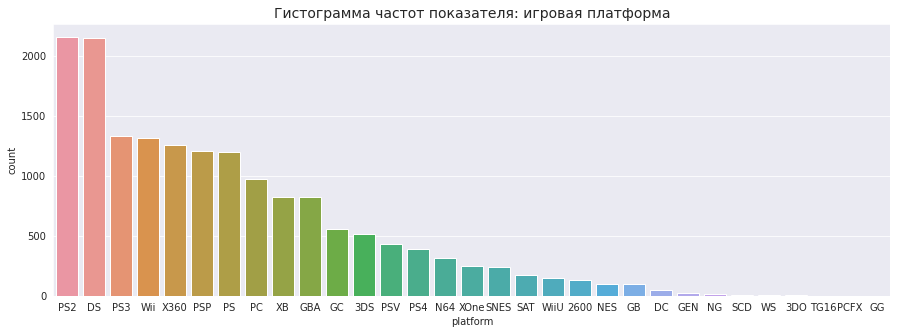

In [17]:
# построение гистограммы распределения частот по типам игровых платформ
plt.figure(figsize=(15, 5))
plt.title('Гистограмма частот показателя: игровая платформа', fontsize=14)
sns.countplot(data = df, x = 'platform', order = df['platform'].value_counts().index)
plt.show();

Судя по гистограмме, лидирующие позиции в индустрии игр занимают компании:
* `Nintento` с платформами `DS`, `Wii`, `GBA`, `GC`, `3DS`, `N64`;
* `Sony` с платформами `PS2`, `PS3`, `PSP`, `PS`, `PSV`, `PS4`;
* `Microsoft` с платформами `X360`, `XB`, `XOne`;
* на восьмом месте также находится платформа `PC` (персональные компьютеры).

Это похоже на реальное распределении ведущих игроков в индустрии компьютерных игр. По данному показателю выборка выглядит репрезентативной.

#### Предобработка данных с годами релиза игр (столбец year_of_release)

Тип данных в стобце `year_of_release` соотвествует `float64`. Столбец содержит пропуски в количестве `269` единиц или `1.6%` от всех данных. Для принятия решений о предобработке данных по году релиза игр посмотрим на несколько строк с пропусками по данному показателю.

In [18]:
# просмотр строк с пропусками по году релиза игр в столбце year_of_release
display(df[df['year_of_release'].isna()].head(10))

,game_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
677,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
718,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
804,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


Какой-либо явной закономерности в пропусках не наблюдается. Данные пропущены по различным играм, жанрам и платформам. Можно предположить, что пропуски возникли на стадии сбора данных из-за невозможности получения соотвествующих показателей.
Так как игры могут выпускаться на различных платформах, можно попробовать заполнить пропущенные значения годами релиза одноимённых игр с других платформ.

На разных платформах игры могут выходить с разницей до 1 года. Поэтому, при подобном заполнении пропущенных значений возможны некоторые отклонения от действительного года релиза игр, которые не будут оказывать значимого влияния на исходные данные.

In [19]:
# заполнение пропущенных значений по годам релиза игр годами релиза одноимённых игр с других платформ
#  с помощью методов fillna(), groupby() и transform()
df = df.fillna({'year_of_release': df.groupby('game_name')['year_of_release'].transform('max')})

Проверим, что получилось с пропущенными значениями после произведённых преобразований.

In [20]:
# пересчёт количества пропущенных значений по году релиза игр в столбце year_of_release
print('Количество пропущенных значений по году релиза игр:', df['year_of_release'].isna().sum())

Количество пропущенных значений по году релиза игр: 146


In [21]:
# доля пропущенных значений по году релиза игр в столбце year_of_release
print('Доля пропущенных значений по году релиза игр: %.3f' % df['year_of_release'].isna().mean())

Доля пропущенных значений по году релиза игр: 0.009


Осталось `146` или немногим менее `1%` пропущенных значений с данными по году релиза игр. Если их заполнить медианными значениями, взятыми из групп по типу платформы игры `platform`, то это позволит заполнить пропущенные значения данными, которые будут умеренно отличаться от истинных.

In [22]:
# определим индексы пропущенных данных для последующей перезаписи значений в столбце year_of_release
indexes = df[df['year_of_release'].isna()].index

In [23]:
# создание вспомогательного датафрейма с соответствующими медианными значениями годов релиза игр в зависимости от платформы
year_of_release_df = df[~df['year_of_release'].isna()].groupby('platform').agg({'year_of_release': 'median'})

# переименование столбца year_of_release в year_of_release_median
year_of_release_df = year_of_release_df.rename(columns={'year_of_release': 'year_of_release_median'})

# округление данных до целых чисел в большую сторону
year_of_release_df['year_of_release_median'] = np.ceil(year_of_release_df['year_of_release_median']).astype('int64')

# просмотр первых 10 строк из полученного датафрейма
display(year_of_release_df.head(10))

,year_of_release_median
platform,
2600,1982
3DO,1995
3DS,2013
DC,2000
DS,2008
GB,1997
GBA,2003
GC,2003
GEN,1993


Медианные значения выглядят правдоподобно. Произведём замену пропущенных значений в столбцe `year_of_release`, используя полученные данные. Для этого создадим словарь по которому произведем замену с использованием функции *map()*.

In [24]:
# создание словаря медианных значений по году релиза игр для функции map()
year_of_release_dict = year_of_release_df.to_dict()['year_of_release_median']
display(year_of_release_dict)

# замена пропущенных значений в столбце year_of_release на медианные в зависимости от платформы
# с помощью функции map()
df.loc[indexes, 'year_of_release'] = df.loc[indexes, 'platform'].map(year_of_release_dict)

{'2600': 1982,
 '3DO': 1995,
 '3DS': 2013,
 'DC': 2000,
 'DS': 2008,
 'GB': 1997,
 'GBA': 2003,
 'GC': 2003,
 'GEN': 1993,
 'GG': 1992,
 'N64': 1999,
 'NES': 1987,
 'NG': 1995,
 'PC': 2010,
 'PCFX': 1996,
 'PS': 1998,
 'PS2': 2005,
 'PS3': 2011,
 'PS4': 2015,
 'PSP': 2009,
 'PSV': 2014,
 'SAT': 1996,
 'SCD': 1994,
 'SNES': 1994,
 'TG16': 1995,
 'WS': 2000,
 'Wii': 2009,
 'WiiU': 2013,
 'X360': 2010,
 'XB': 2004,
 'XOne': 2015}

In [25]:
# преобразование типа данных в столбце year_of_release к целочисленному типу
df['year_of_release'] = df['year_of_release'].astype('int64')

Проверим количество пропущенных значений в столбце `year_of_release` после заполнения пропусков.

In [26]:
# просмотр количества строк с пропусками по названию игр в столбце year_of_release
print('Пропущенных значений в стобце year_of_release:', df['year_of_release'].isna().sum())

Пропущенных значений в стобце year_of_release: 0


Таким образом, удалось без значительного искажения данных полностью избавиться от пропусков в столбце `year_of_release`. Далее посмотрим на основные описательные статистики по данному показателю.

In [27]:
# просмотр основных описательных статистик данных по году релиза игр
df['year_of_release'].describe()

count    16713.000000
mean      2006.472686
std          5.894658
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

В завершении анализа данных по показателю год релиза игр построим гистограммы плотности распределения и частот.

In [28]:
# функция для построения парных гистограмм распределения частот и плотности
def pair_hists(params, label, bins):
    """
    input: params (pandas.Series) - данные для построения гистограмм
           label (str)            - наименование столбца данных
           bin (int)              - количество корзин для построения гистограмм
    output: None
    description: Функция для построения парных гистограмм для исследуемого параметра:
                 - Первая гистограмма отображает распределение частот с помощью параметра stat = frequency
                 - Вторая гистограмма отображает плотность распределения с помощью параметра stat = density
    """

    sns.set()
    sns.set_palette(palette = 'CMRmap')
    f, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    axes[0].set_title(label + '. Гистограмма частот.', fontsize = 14)
    axes[0].set_ylabel('Количество', fontsize = 14)
    sns.histplot(params, bins = bins, alpha = 0.5, ax = axes[0], stat='frequency')
    
    axes[1].set_title(label + '. Плотность распределения.', fontsize = 14)
    axes[1].set_ylabel('Плотность', fontsize = 14)
    sns.histplot(params, bins = bins, kde = True, ax = axes[1], stat='density')
    plt.show()

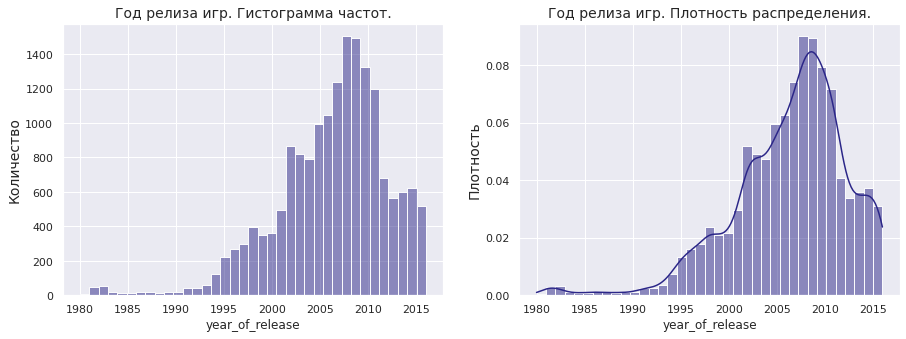

In [29]:
# отображение парных гистограмм по году релиза игр
pair_hists(df['year_of_release'], 'Год релиза игр', bins=37)

* До `1990` года игр было немного. С развитием доступности персональных компьютеров и выпуском различных игровых приставок начинается бурный рост игровой индустрии, который достигает пиковых значений в `2007-2008` гг. После резкого роста неизбежно следует стабилизация и откат. С рынка уходят мелкие игроки или их поглощают крупные вендоры, которые сосредотачиваются на выпусках новых релизов игр, завоевавших популярность у пользователей.

#### Предобработка данных по жанру игр (столбец genre)

Тип данных в стобце `genre` соотвествует `object`. Пропуски данных в столбце `genre`, как следует из общего обзора данных, отсуствуют. Отобразим количество уникальных значений по данному показателю.

In [30]:
# просмотр количества уникальных значений по игровым жанрам в столбце genre
print('Количество уникальных жанров игр:', df['genre'].nunique())

Количество уникальных жанров игр: 12


Отобразим гистограмму распределения частот по данному показателю.

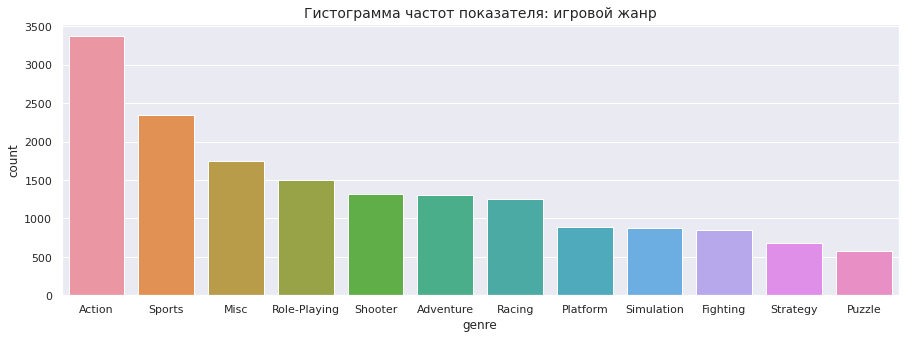

In [31]:
# построение гистограммы частот распределения по типам игровых жанров
plt.figure(figsize=(15, 5))
plt.title('Гистограмма частот показателя: игровой жанр', fontsize=14)
sns.countplot(data = df, x = 'genre', order = df['genre'].value_counts().index)
plt.show();

* Наибольшей популярностью у пользователей пользуются игры жанров `Action` и `Sport`. Наименее востребованы: `Strategy` и `Puzzle`. По признаку распределения игр по жанрам в выборке, данные также выглядят релевантными.

#### Предобработка данных по продажам в Северной Америке (столбец na_sales)

Как следует из описания, данные в этом столбце отражают продажи игр в Северной Америке в миллионах проданных копий. Тип данных `float64`. Пропущенных значений в данных по продажам игр в Северной Америке нет. Исключим данные с нулевыми значениями, которые означают, что в данном регионе продаж игр не было и посмотрим на основные описательные статистики по данному параметру.

In [32]:
# просмотр основных описательных статистик данных по продажам в Северной Америке
df.loc[df['na_sales'] > 0, 'na_sales'].describe()

count    12206.000000
mean         0.360525
std          0.933409
min          0.010000
25%          0.060000
50%          0.140000
75%          0.340000
max         41.360000
Name: na_sales, dtype: float64

Определим верхнюю границу продаж, за которой будут уже находится выбросы по данному показателю. Для этого построим график типа *boxplot* (ящик с усами). Так как подобных графиков будет несколько, создадим для них вспомогательную функцию, которая поможет избежать дублирования кода.

In [33]:
# вспомогательная функция для построения графиков типа boxplot
def show_boxplot(data, title, palette, scale = 'linear'):
    """
    input: data (pandas.Series)   - данные для построения графика
           title (str)            - название графика (исследуемого параметра)
           palette (str)          - цветовая схема заполнения
           scele (str)            - тип шкалы, используемой для построения ("linear", "log", "symlog", "logit", ...)
    output: None
    description: Функция для построения графиков типа ящик с усами (boxplot) по заданным входным параметрам
    
    """
    plt.figure(figsize=(12, 5))
    ax = sns.boxplot(x = data, palette = palette, orient = 'h')
    ax.set_title(title, fontsize = 14)
    ax.set_xlabel('')
    ax.set(xscale = scale)
    plt.show();

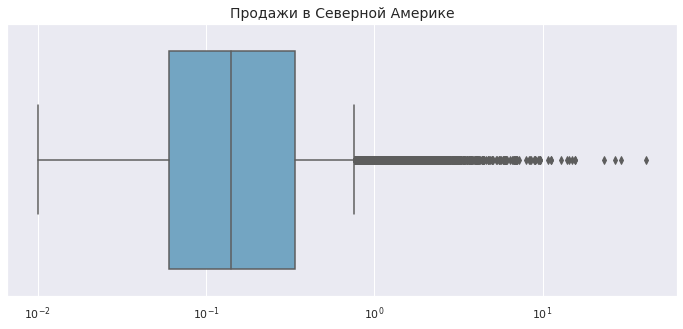

In [34]:
# построение ящика с усами для na_sales с помощью функции show_boxplot()
show_boxplot(df.loc[df['na_sales'] > 0, 'na_sales'], 'Продажи в Северной Америке', 'PuBuGn', scale = 'log')

Выбросов справа настолько много и они столь значительны, что график корректно отображается только в логарифмической шкале. Рассчитаем точное значение правой границы, за которой данные можно отнести к выбросам.

In [35]:
# расчёт значения правой границы значений продаж в Северной Америке
max_na_sales = df.loc[df['na_sales'] > 0, 'na_sales'].describe()['75%'] + \
(df.loc[df['na_sales'] > 0, 'na_sales'].describe()['75%'] - df.loc[df['na_sales'] > 0, 'na_sales'].describe()['25%']) * 1.5
display(max_na_sales)

0.76

Построим гистограммы распределения для продаж в Северной Америке. Для построения исключим данные с нулевыми значениями, а также данные, более `1 млн.` продаж, которые дают большой правый хвост и нарушают тем самым визуализацию данных.

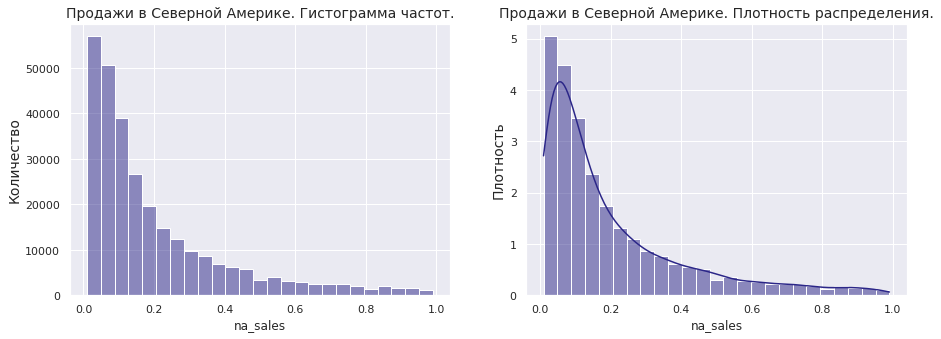

In [36]:
# отображение парных гистограмм по продажам игр в Северной Америке
pair_hists(df.loc[(df['na_sales'] > 0) & (df['na_sales'] < 1), 'na_sales'], 'Продажи в Северной Америке', bins=25)

Подсчитаем долю выбросов по отношению ко всем данным.

In [37]:
# расчёт доли выбросов по показателю продаж в Северной Америке na_sales
print('Доля выбросов по отношению к общему количеству данных составляет:', \
      round(df.loc[df['na_sales'] > 0.76].shape[0] / df.loc[df['na_sales'] > 0, 'na_sales'].shape[0], 4))

Доля выбросов по отношению к общему количеству данных составляет: 0.1054


* Среднее значение для показателя продаж в Северной Америке равно `0.36` и оно значительно превышает медианное значение `0.14`. Данные имеют сильный скос вправо и очень длинный правый хвост.
* Большинство игр продаются в Северной Америке в количестве до `0.76 млн.` копий. Но, есть и такие, продажи которых превышают десятки миллионов.
* Доля игр с большим количеством продаж по отношению ко всем анализируемым данным составляет `10.54%`. Вероятно, это завоевавшие популярность у пользователей игры от крупных издателей.

#### Предобработка данных по продажам в Европе (столбец eu_sales)

Как следует из описания, данные в этом столбце отражают продажи игр в Европе в миллионах проданных копий. Тип данных `float64`. Пропущенных значений в данных по продажам игр в Европе нет. Посмотрим на основные описательные статистики по данному параметру.

In [38]:
# просмотр основных описательных статистик данных по продажам в Европе
df.loc[df['eu_sales'] > 0, 'eu_sales'].describe()

count    10844.000000
mean         0.223547
std          0.610706
min          0.010000
25%          0.020000
50%          0.070000
75%          0.200000
max         28.960000
Name: eu_sales, dtype: float64

Определим правую границу продаж, за которой уже будут находится выбросы по данному показателю. Для этого построим график типа *boxplot* (ящик с усами).

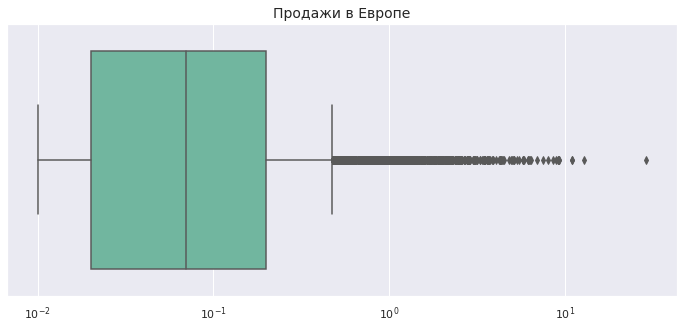

In [39]:
# построение ящика с усами для eu_sales с помощью функции show_boxplot()
show_boxplot(df.loc[df['eu_sales'] > 0, 'eu_sales'], 'Продажи в Европе', 'BuGn', scale = 'log')

Как и для рынка Северной Америки на европейском рынке также выбросов настолько много и они столь значительны, что график корректно отображается только в логарифмической шкале. Рассчитаем точное значение правой границы.

In [40]:
# расчёт значения правой границы для значений продаж в Европе
max_eu_sales = df.loc[df['eu_sales'] > 0, 'eu_sales'].describe()['75%'] + \
(df.loc[df['eu_sales'] > 0, 'eu_sales'].describe()['75%'] - df.loc[df['eu_sales'] > 0, 'eu_sales'].describe()['25%']) * 1.5
display(max_eu_sales)

0.47000000000000003

Построим гистограммы распределения для продаж в Европе. Для построения исключим данные с нулевыми значениями, а также данные, более `0.5 млн.` продаж, которые дают большой правый хвост и нарушают тем самым визуализацию данных.

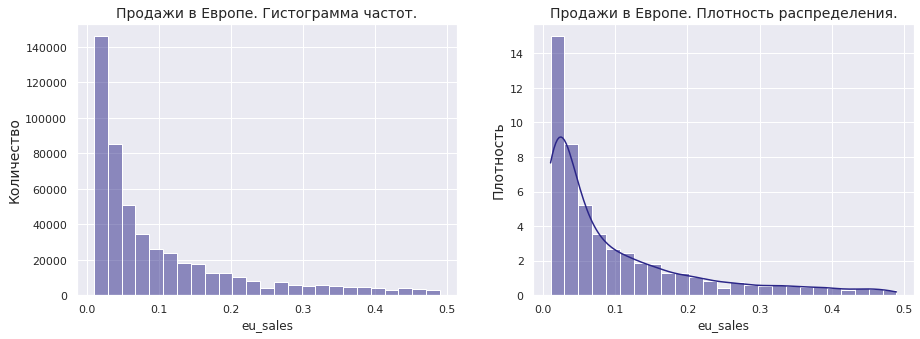

In [41]:
# отображение парных гистограмм по продажам игр в Европе
pair_hists(df.loc[(df['eu_sales'] > 0) & (df['eu_sales'] < 0.5), 'eu_sales'], 'Продажи в Европе', bins=25)

Подсчитаем долю выбросов по отношению ко всем данным.

In [42]:
# расчет доли выбросов по показателю продаж в Европе eu_sales
print('Доля выбросов по отношению к общему количеству данных составляет:', \
      round(df.loc[df['eu_sales'] > 0.47].shape[0] / df.loc[df['eu_sales'] > 0, 'eu_sales'].shape[0], 4))

Доля выбросов по отношению к общему количеству данных составляет: 0.1069


* Характер распределения продаж в Европе очень похож на распределение продаж в Северной Америке. Среднее значение `0.22` также значительно превышает медианное `0.07`. Данные имеют сильный скос вправо и очень длинный правый хвост.
* Большинство игр продаются в Европе в количестве до `0.47 млн.` копий. Но, также продажи некоторых игр превышают миллионный рубеж.
* Доля игр с большим количеством продаж по отношению ко всем анализируемым данным составляет `10.69%`. Вероятно, это завоевавшие популряность у пользователей игры от крупных издателей.

#### Предобработка данных по продажам в Японии (столбец jp_sales)

Как следует из описания, данные в этом столбце отражают продажи игр в Японии в миллионах проданных копий. Тип данных `float64`. Пропущенных значений в данных по продажам игр в Японии нет. Посмотрим на основные описательные статистики по данному параметру.

In [43]:
# просмотр основных описательных статистик данных по продажам в Японии
df.loc[df['jp_sales'] > 0, 'jp_sales'].describe()

count    6200.000000
mean        0.209248
std         0.479216
min         0.010000
25%         0.030000
50%         0.070000
75%         0.190000
max        10.220000
Name: jp_sales, dtype: float64

Определим правую границу продаж, за которой уже будут находится выбросы по данному показателю. Для этого построим график типа *boxplot* (ящик с усами).

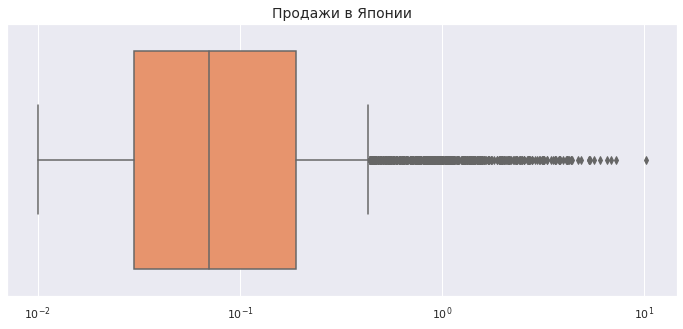

In [44]:
# построение ящика с усами для jp_sales с помощью функции show_boxplot()
show_boxplot(df.loc[df['jp_sales'] > 0, 'jp_sales'], 'Продажи в Японии', 'OrRd', scale = 'log')

Как и для двух предыдущих рынков Европы и Северной Америки на японском рынке также выбросов очень много и они столь значительны, что график корректно отображается только в логарифмической шкале. Рассчитаем точное значение правой границы.

In [45]:
# расчёт значения правой границы значений продаж в Японии
max_jp_sales = df.loc[df['jp_sales'] > 0, 'jp_sales'].describe()['75%'] + \
(df.loc[df['jp_sales'] > 0, 'jp_sales'].describe()['75%'] - df.loc[df['jp_sales'] > 0, 'jp_sales'].describe()['25%']) * 1.5
display(max_jp_sales)

0.43

Построим гистограммы распределения для продаж в Японии. Для построения исключим данные с нулевыми значениями, а также данные, более `0.5 млн.` продаж, которые дают большой правый хвост и нарушают тем самым визуализацию данных.

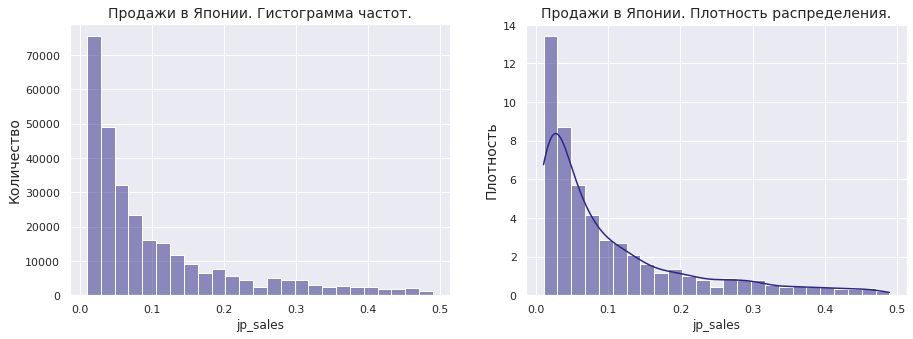

In [46]:
# отображение парных гистограмм по продажам игр в Японии
pair_hists(df.loc[(df['jp_sales'] > 0) & (df['jp_sales'] < 0.5), 'jp_sales'], 'Продажи в Японии', bins=25)

Подсчитаем долю выбросов по отношению ко всем данным.

In [47]:
# расчёт доли выбросов по показателю продаж в Японии jp_sales
print('Доля выбросов по отношению к общему количеству данных составляет:', \
      round(df.loc[df['jp_sales'] > 0.43].shape[0] / df.loc[df['jp_sales'] > 0, 'jp_sales'].shape[0], 4))

Доля выбросов по отношению к общему количеству данных составляет: 0.109


* Характер распределения продаж игр в Японии очень похож на распределения продаж в Европе и Северной Америке. Среднее значение `0.21` также значительно превышает медианное `0.07`. Данные имеют сильный скос вправо и очень длинный правый хвост.
* Большинство игр продаются в Японии в количестве до `0.43 млн.` копий. Но, также продажи некоторых игр превышают миллионные рубежи.
* Доля игр с большим количеством продаж по отношению ко всем анализируемым данным составляет `10.9%`. Вероятно, это завоевавшие популярность у пользователей игры от крупных издателей.

#### Предобработка данных по продажам в других странах (столбец other_sales)

Как следует из описания, данные в этом столбце отражают продажи игр в других странах в миллионах проданных копий. Тип данных `float64`. Пропущенных значений в данных по продажам игр в других странах нет. Посмотрим на основные описательные статистики по данному параметру.

In [48]:
# просмотр основных описательных статистик данных по продажам в других странах
df.loc[df['other_sales'] > 0, 'other_sales'].describe()

count    10113.00000
mean         0.07824
std          0.23498
min          0.01000
25%          0.01000
50%          0.02000
75%          0.07000
max         10.57000
Name: other_sales, dtype: float64

Определим правую границу продаж, за которой уже будут находится выбросы по данному показателю. Для этого построим график типа *boxplot* (ящик с усами).

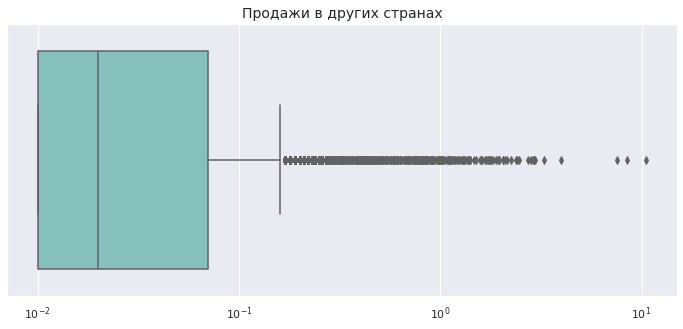

In [49]:
# построение ящика с усами для other_sales с помощью функции show_boxplot()
show_boxplot(df.loc[df['other_sales'] > 0, 'other_sales'], 'Продажи в других странах', 'GnBu', scale = 'log')

Как и в случае с рынками Европы, Северной Америки и Японии, для других стран также выбросов очень много и они столь значительны, что график корректно отображается только в логарифмической шкале. Рассчитаем точное значение правой границы.

In [50]:
# расчёт значения правой границы значений продаж в других странах
max_other_sales = df.loc[df['other_sales'] > 0, 'other_sales'].describe()['75%'] + \
(df.loc[df['other_sales'] > 0, 'other_sales']\
.describe()['75%'] - df.loc[df['other_sales'] > 0, 'other_sales'].describe()['25%']) * 1.5
display(max_other_sales)

0.16000000000000003

Построим гистограммы распределения для продаж в других странах. Для построения исключим данные с нулевыми значениями, а также данные, более `0.25 млн.` продаж, которые дают большой правый хвост и нарушают тем самым визуализацию данных.

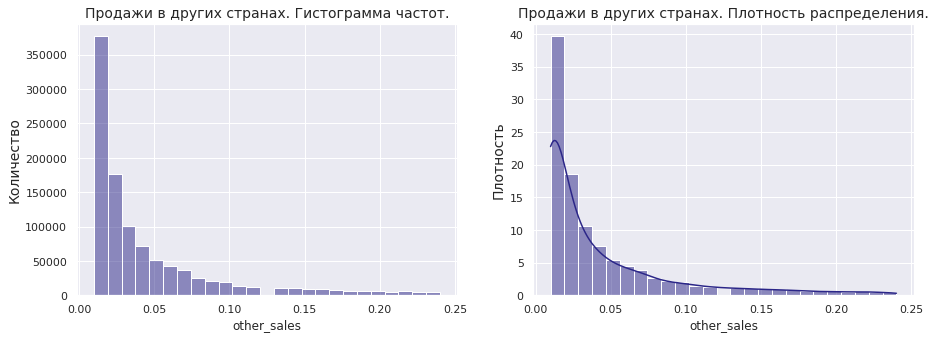

In [51]:
# отображение парных гистограмм по продажам игр в других странах
pair_hists(df.loc[(df['other_sales'] > 0) & (df['other_sales'] < 0.25), 'other_sales'], 'Продажи в других странах', bins=25)

Подсчитаем долю выбросов по отношению ко всем данным.

In [52]:
# расчёт доли выбросов по показателю продаж в других странах other_sales
print('Доля выбросов по отношению к общему количеству данных составляет:', \
      round(df.loc[df['other_sales'] > 0.16].shape[0] / df.loc[df['other_sales'] > 0, 'other_sales'].shape[0], 4))

Доля выбросов по отношению к общему количеству данных составляет: 0.1018


* Характер распределения продаж игр в других странах очень похож на распределения продаж на остальных рассмотренных ранее рынках: в Европе, Северной Америке и Японии. Среднее значение `0.07` также значительно превышает медианное `0.02`. Данные имеют сильный скос вправо и очень длинный правый хвост.
* Большинство игр продаются в других странах в количестве до `0.16 млн.` копий. Но, также продажи некоторых игр превышают миллионные рубежи.
* Доля игр с большим количеством продаж по отношению ко всем анализируемым данным составляет `10.18%`. Вероятно, это завоевавшие популярность у пользователей игры от крупных издателей.

#### Предобработка данных по оценкам критиков (столбец critic_score)

Согласно описанию, данные в столбце `critic_score` отражают оценки игр со стороны критиков с максимальным значением, равным `100`. Тип данных `float64`. Пропущенных значений в данных по оценкам критиков много: `8576` строк или `51%`. Посмотрим на основные описательные статистики по данному параметру.

In [53]:
# просмотр основных описательных статистик данных по оценкам критиков
df.loc[df['critic_score'].notna(), 'critic_score'].describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

Произведём визуальную оценку данных с пропущенными значениями в столбце `critic_score`. Для этого просмотрим первые 15 строк из соотвествующей выборки.

In [54]:
# просмотр данных с пропущенными значениями по оценкам критиков
display(df[df['critic_score'].isna()].head(15))

,game_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


* Каких-либо явных закономерностей в пропусках данных по столбцу `critic_score` не наблюдается. Данные пропущены для разных платформ, годов релиза игр и  жанров. Пропуски могли возникнуть как на этапе сбора информации, так и в процессе выгрузки данных.
* Отсуствует какой-либо логичный способ, с помощью которого можно было бы заполнить пропущенные значения. Оценки критиков могут различаться в любых группах, которые можно выделить в данных (жанрах, годах релиза, платформах).
* Оставим пропущенные значения в данном столбце как есть.

Построим гистограммы распределения для оценок критиков.

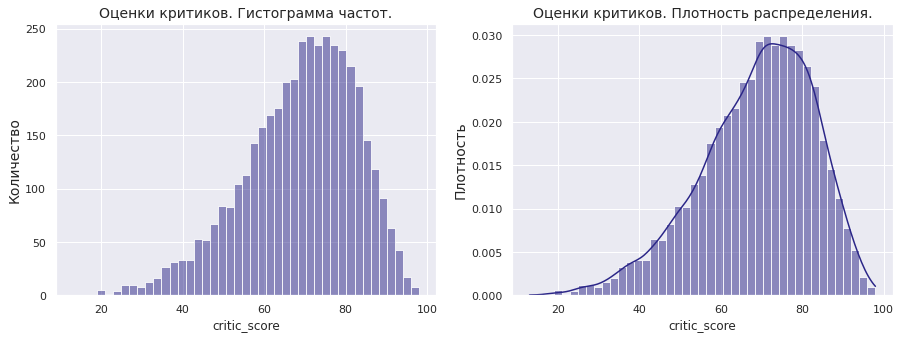

In [55]:
# отображение парных гистограмм по оценкам критиков
pair_hists(df.loc[df['critic_score'].notna(), 'critic_score'], 'Оценки критиков', bins=43)

Для определения наличия выбросов и установления их границ построим график типа *boxplot* (ящик с усами).

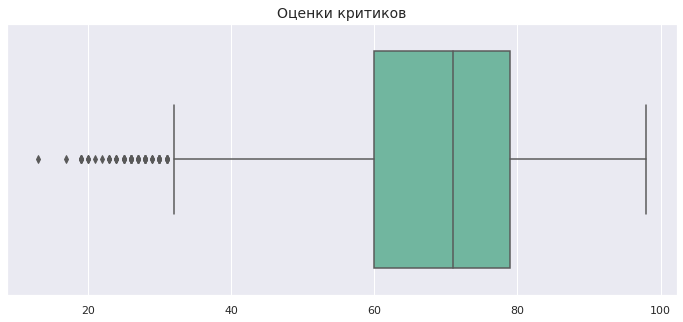

In [56]:
# построение ящика с усами для user_score с помощью функции show_boxplot()
show_boxplot(df['critic_score'], 'Оценки критиков', 'BuGn', scale = 'linear')

Выбросы по оценкам критиков находятся за границей левого уса. Определим её численное значение.

In [57]:
# расчёт значения левой границы значений оценок критиков
min_critic_score = round(df.loc[df['critic_score'].notna(), 'critic_score'].describe()['25%'] - \
(df.loc[df['critic_score'].notna(), 'critic_score'].describe()['75%'] - \
df.loc[df['critic_score'].notna(), 'critic_score'].describe()['25%']) * 1.5)
display(min_critic_score)

32

Подсчитаем долю выбросов по отношению ко всем непропущенным данным.

In [58]:
# расчет доли выбросов по показателю оценки критиков critic_score
print('Доля выбросов по отношению к общему количеству непропущенных данных составляет:', \
      round(df.loc[(df['critic_score'] < 32) & df['critic_score'].notna()].shape[0] \
            / df.loc[df['critic_score'].notna(), 'critic_score'].shape[0], 4))

Доля выбросов по отношению к общему количеству непропущенных данных составляет: 0.0102


* В данных по оценкам критиков столбца `critic_score` среднее значение, равное `69`, немного меньше медианного, равного `71`. Данные имеют незначительный скос влево. Значения меньше `32` встречаются редко и их можно отнести к выбросам.
* Доля выбросов по отношению к непропущенным данным небольшая и составляет `1.02%`. При необходимости таким количеством данных можно будет пожертвовать без значимого влияния на остальные данные. Пока оставим данные как есть.

#### Предобработка данных по оценкам пользователей (столбец user_score)

Согласно описанию, данные в столбце `user_score` отражают оценки игр со стороны пользователей с максимальным значением, равным `10`. Тип данных в столбце `object`, что не соотвествует типу хранящимся в нём данных. Если из-за пропущенных значений не представится возможным преобразовать тип данных к целочисленным значениям, то необходимо будет привести его к значениям типа `float`.

Пропущенных значений в данных по оценкам пользователей много: `6699` строк или `40%`. Посмотрим какие данные он содержит и почему может иметь тип `object`.

In [59]:
# просмотр значений столбца user_score с оценками игр со стороны пользователей
display(df['user_score'].value_counts())

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
9.6       2
2.3       2
1         2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

Столбец `user_score` с оценками игр со стороны пользователей получил тип данных `object` по причине того, что содержит `2424` строки со строковым значением **`tbd`**, представляющим собой аббревиатуру от английского `to be discussed - подлежит уточнению`. Это означает, что пользовательская оценка не была доступна на момент формирования данных. Следовательно, эту аббревиатуру **`tbd`** логично заменить значением `NaN`, что ещё сильнее увеличит долю пропущенных значений по данному показателю.

In [60]:
# замена значений tbd на NaN для оценок пользователей
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan

Преобразуем данные в стобце `user_score` к типу `float` и пересчитаем количество пропущенных значений после произведённых замен и преобразований.

In [61]:
# преобразование данных с помощью метода to_numeric()
df['user_score'] = pd.to_numeric(df['user_score'], downcast='float')

# чтобы данные в таблице были однотипными преобразуем столбец из float32 во float64
df['user_score'] = df['user_score'].astype('float64')

In [62]:
# пересчёт количества пропущенных значений после проведённых замен и преобразований
display(df['user_score'].isna().sum())

9123

In [63]:
# доля пропущенных значений по оценкам пользователей user_score по отношению ко всем данным
print('Доля пропущенных значений по оценкам пользователей: %.4f' % df['user_score'].isna().mean())

Доля пропущенных значений по оценкам пользователей: 0.5459


В результате произведённых замен количество пропущенных значений увеличилось с `6699` строк или `40%` до `9123` строк или `55%`. Произведём визуальную оценку данных с пропущенными значениями в столбце `user_score`. Для этого просмотрим первые 15 строк из соотвествующей выборки.

In [64]:
# просмотр данных с пропущенными значениями по оценкам критиков
display(df[df['user_score'].isna()].head(15))

,game_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


* Как и в случае оценок критиков, пропущенные данные весьма разнородны и не демонстрируют явных закономерностей. Данные пропущены для разных платформ, годов релиза игр и  жанров. Пропуски могли возникнуть как на этапе сбора информации, так и в процессе выгрузки данных.
* Также отсуствует какой-либо логичный способ, с помощью которого можно было бы заполнить пропущенные значения на основе имеющихся данных. Оценки пользователей могут различаться в любых группах, которые можно выделить в данных (жанрах, годах релиза, платформах), ещё сильнее, чем оценки критиков.

Посмотрим на основные описательные статистики по данному параметру.

In [65]:
# просмотр основных описательных статистик данных по оценкам пользователей
df['user_score'].describe()

count    7590.000000
mean        7.125046
std         1.500006
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

Построим гистограммы распределения для оценок пользователей.

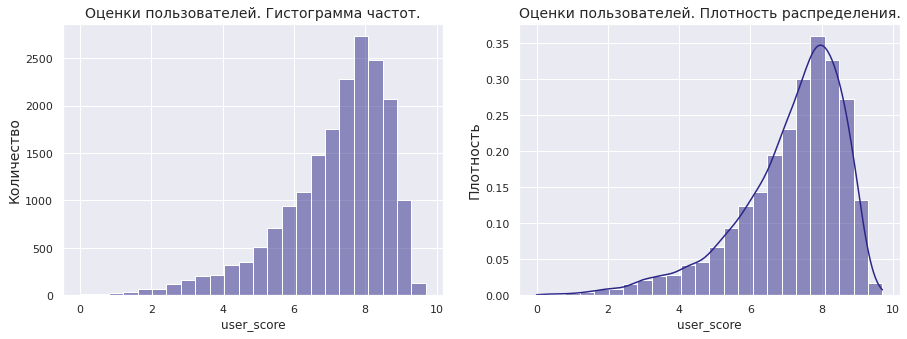

In [66]:
# отображение парных гистограмм по оценкам пользователей
pair_hists(df.loc[df['user_score'].notnull(), 'user_score'], 'Оценки пользователей', bins=24)

Для определения наличия выбросов и установления их границ построим график типа *boxplot* (ящик с усами).

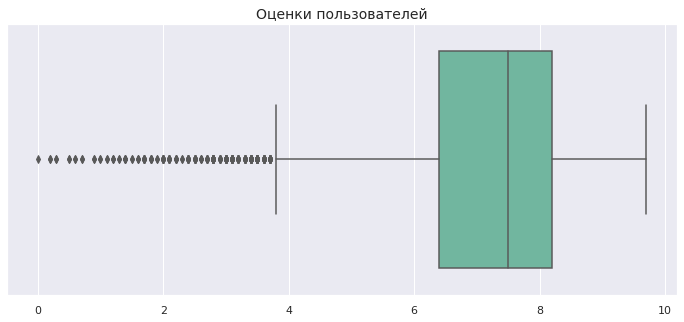

In [67]:
# построение ящика с усами для user_score с помощью функции show_boxplot()
show_boxplot(df.loc[df['user_score'].notna(), 'user_score'], 'Оценки пользователей', 'BuGn', scale = 'linear')

Наблюдаемые выбросы по оценкам пользователей находятся за границей левого уса. Определим её численное значение.

In [68]:
# расчёт значения левой границы значений оценок пользователей
min_user_score = round(df.loc[df['user_score'].notnull(), 'user_score'].describe()['25%'] - \
(df.loc[df['user_score'].notnull(), 'user_score'].describe()['75%'] - \
df.loc[df['user_score'].notnull(), 'user_score'].describe()['25%']) * 1.5, 1)
display(min_user_score)

3.7

Подсчитаем долю выбросов по отношению ко всем непропущенным данным.

In [69]:
# расчет доли выбросов по показателю оценки критиков critic_score
print('Доля выбросов по отношению к общему количеству непропущенный данных составляет:', \
      round(df.loc[(df['user_score'] < 3.7) & df['user_score'].notnull()].shape[0] \
            / df.loc[df['user_score'].notnull(), 'user_score'].shape[0], 4))

Доля выбросов по отношению к общему количеству непропущенный данных составляет: 0.0377


* В данных по оценкам критиков столбца `user_score` среднее значение, равное `7.13`, немного меньше медианного, равного `7.50`. Данные имеют скос влево. Значения меньше `3.7` встречаются редко и их можно отнести к выбросам.
* Доля выбросов по отношению к непропущенным данным существенная и составляет `3.77%`. Удаление такого объёма данных может оказывать влияние на остальные данные. Оставим данные как есть на данном этапе.

#### Предобработка данных по рейтингу (столбец rating)

Согласно описанию, в столбце `rating` данные соответствуют рейтингу от организации **`ESRB`** *(от англ. Entertainment Software Rating Board)*, которая определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Пропущенных значений в данных по оценкам пользователей много: `6764` строк или `40%`.
Тип данных в столбце `object`, что соотвествует типу хранящимся в нём данных. Посмотрим какие уникальные значения он содержит.

In [70]:
# просмотр уникальных значений в столбце rating
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Обратимся к Википедии по адресу https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board для получения дополнительной информации об организации **`ESRB`** и значениях рейтинга, которые содержатся в исследуемых данных.

Согласно Википедии, Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности которой, принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде.

Содержащиеся в столбце `rating` уникальные значения соотвествуют следующим возрастным категориям:
* `E`    - («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет.
* `M`    - («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет.
* `T`    - («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет.
* `E10+` - («Everyone 10 and older») — «Для всех от 10 лет и старше»: Игра подходит для лиц от 10 лет.
* `K-A`  - («Kids to Adults») - «От детей ло всзрослых»: Впоследствии стала категорией `E`.
* `AO`   - «AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет.
* `EC`   - «EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет.
* `RP`   - «RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга.

Посмотрим как часто встречается тот или иной рейтинг в данных.

In [71]:
# просмотр распределения значений столбца rating
display(df['rating'].value_counts())

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64

Рейтинг `RP` («Рейтинг ожидается») логично было бы отнести к `NaN` данным, а рейтинги `K-A`(«От детей до взрослых») и `EC` «Для детей младшего возраста» без потери заложенного в рейтинге смысла можно отнести к категории `E` («Для всех»). Проведём соотвествующие замены в данных.

In [72]:
# замены редких категорий рейтинга ESRB
df.loc[df['rating'] == 'RP', 'rating'] = np.nan
df.loc[(df['rating'] == 'K-A') | (df['rating'] == 'EC'), 'rating'] = 'E'
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO'], dtype=object)

Пересчитаем количество пропущенных значений после произведённых замен и преобразований.

In [73]:
# пересчёт количества пропущенных значений после проведённых замен и преобразований
display(df['rating'].isna().sum())

6767

In [74]:
# доля пропущенных значений по рейтингу rating по отношению ко всем данным
print('Доля пропущенных значений по оценкам пользователей: %.4f' % df['rating'].isna().mean())

Доля пропущенных значений по оценкам пользователей: 0.4049


Произведём визуальную оценку данных с пропущенными значениями в столбце `rating`. Для этого просмотрим первые 15 строк из соотвествующей выборки.

In [75]:
# просмотр данных с пропущенными значениями по рейтингу ESRB
display(df[df['rating'].isna()].head(15))

,game_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


* Пропущенные данные разнородны и не демонстрируют каких-либо закономерностей, на основе которых можно было заполнить пропущенные значения. Данные пропущены для разных платформ, годов релиза игр и  жанров. Пропуски могли возникнуть как на этапе сбора информации, так и в процессе выгрузки данных.

Построим гистограмму частот распределения рейтинга ESRB в исследуемых данных.

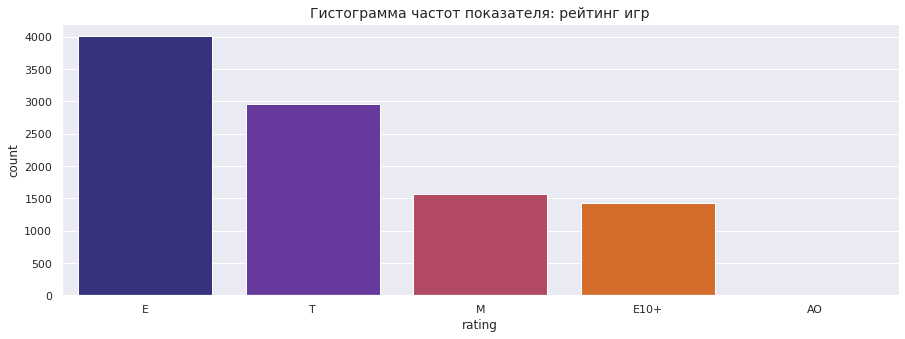

In [76]:
# построение гистограммы частот распределения по типам игровых жанров
plt.figure(figsize=(15, 5))
plt.title('Гистограмма частот показателя: рейтинг игр', fontsize=14)
sns.countplot(data = df, x = 'rating', order = df['rating'].value_counts().index)
plt.show();

* Больше всего игр представлено в категории «Для всех». На втором месте игры категории «Подросткам». Третье место за играми «Для взрослых». Это означает, что производители игр ориентируются на основную целевую игровую аудиторию - детей и подростков. Но, при этом также не забывают и о нише для более взрослых лиц.

### Расчёт дополнительных параметров

#### Подсчёт суммарных продаж во всех регионах

Добавим в существующую таблицу данные о суммарных продажах по всем регионам `total_sales` как сумму продаж в четырёх регионах:
* Северной Америке (столбец `na_sales`);
* Европе (столбец `eu_sales`);
* Японии (столбец `jp_sales`);
* других регионах (столбец `other_sales`).

In [77]:
# добавление данных по суммарным продажам во всех регионах
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

Проверим есть ли по вновь созданному столбцу `total_sales` данные с нулевыми значениями, которые могут помешать последующему исследовательскому анализу.

In [78]:
# просмотр данных с нулевыми значениями по добавленному столбцу total_sales
df.loc[df['total_sales'] == 0]

,game_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16674,G1 Jockey 4 2008,PS3,2008,Sports,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0
16707,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0


Две записи с нулевыми значениями продаж по всем регионам. Их можно удалить без ущерба для дальнейших исследований.

In [79]:
# удаление строк c нулевыми данными total_sales
df = df.drop(df.index[list(df.loc[df['total_sales'] == 0].index)]).reset_index(drop=True)

Посмотрим на основные описательные статистики по данному параметру.

In [80]:
# просмотр основных описательных статистик данных по суммарным продажам
df['total_sales'].describe()

count    16711.000000
mean         0.533379
std          1.548364
min          0.010000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: total_sales, dtype: float64

Определим правую границу продаж, за которой уже будут находится выбросы по данному показателю. Для этого построим график типа *boxplot* (ящик с усами).

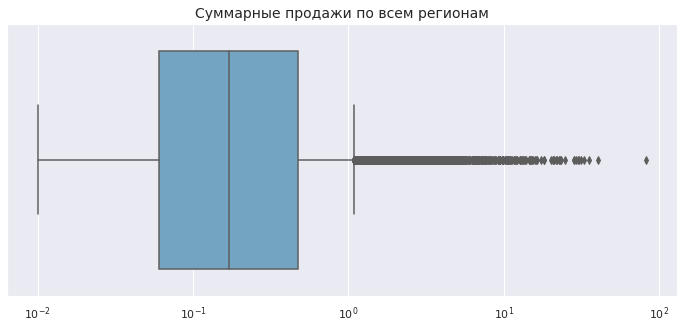

In [81]:
# построение ящика с усами для total_sales с помощью функции show_boxplot()
show_boxplot(df['total_sales'], 'Суммарные продажи по всем регионам', 'PuBuGn', scale = 'log')

График демонстрирует большое количество выбросов за границей правого уса. Рассчитаем точное значение правой границы, за пределами которой остальные данные будут считаться выбросами.

In [82]:
# расчёт значения правой границы для продаж по всем регионам
max_total_sales = df['total_sales'].describe()['75%'] + \
(df['total_sales'].describe()['75%'] - df['total_sales'].describe()['25%']) * 1.5
display(max_total_sales)

1.085

Построим гистограммы распределения продаж по всем регионам. Для построения исключим данные с нулевыми значениями, а также данные, с более чем `1.1 млн.` продаж, которые дают большой правый хвост и нарушают визуализацию данных.

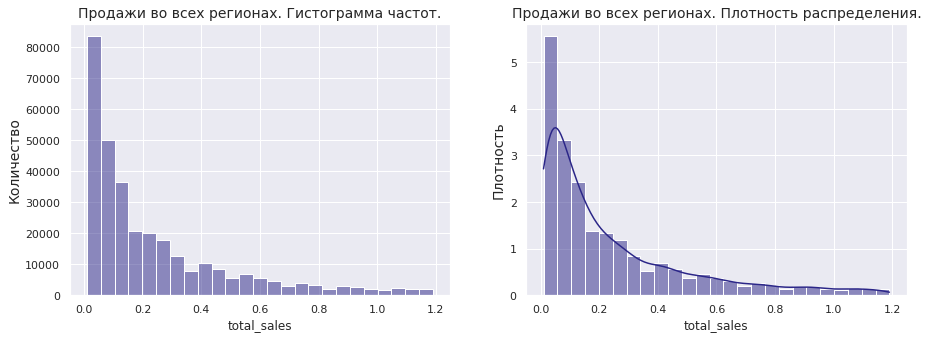

In [83]:
# отображение парных гистограмм по продажам игр во всех регионах
pair_hists(df.loc[(df['total_sales'] > 0) & (df['total_sales'] < 1.2), 'total_sales'], 'Продажи во всех регионах', bins=25)

Подсчитаем долю выбросов по отношению ко всем данным.

In [84]:
# расчёт доли выбросов по показателю продаж во всех регионах total_sales
print('Доля выбросов по отношению к общему количеству данных составляет:', \
      round(df.loc[df['total_sales'] > 1.09].shape[0] / df.loc[df['total_sales'] > 0, 'total_sales'].shape[0], 4))

Доля выбросов по отношению к общему количеству данных составляет: 0.1118


* Характер распределения продаж игр во всех регионах похож на распределения продаж на остальных рассмотренных ранее рынках: в Европе, Северной Америке, Японии и других странах. Среднее значение `0.53` значительно превышает медианное `0.17`. Данные имеют выраженный скос вправо и очень длинный правый хвост.
* Большинство игр продаются во всех регионах в количестве до `1.09 млн.` копий. Но, также есть игры, продажи которых составляют десятки миллионов копий.
* Доля игр с таким большим количеством продаж по отношению ко всем анализируемым данным составляет `11.18%`. Вероятно, это завоевавшие популярность у пользователей игры от крупных издателей.

Посмотрим на итоговый вид данных, полученный после этапа предобработки.

In [85]:
# просмотр сводной информации о данных после предобработки
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16711 entries, 0 to 16710
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   game_name        16711 non-null  object 
 1   platform         16711 non-null  object 
 2   year_of_release  16711 non-null  int64  
 3   genre            16711 non-null  object 
 4   na_sales         16711 non-null  float64
 5   eu_sales         16711 non-null  float64
 6   jp_sales         16711 non-null  float64
 7   other_sales      16711 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9946 non-null   object 
 11  total_sales      16711 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


### Выводы по предобработке данных

* Осуществлена корректировка стиля заголовков в столбцах таблицы. Все символы приведены к нижнему регистру.
* Проведено расширенное исследование и анализ полученных данных по результатам которого проведены необходимые преобразования.
    * Проведено преобразование типов данных, значения которых не соотвествуют их физическому смыслу. Год релиза игр `year_of_release` преобразован к значениям целочисленного типа `int64`. Оценки пользователей `user_score` преобразованы к типу данных `float64`. 
    * Пропущенные значения в данных с годами релиза игр (столбец `year_of_release`) заполнены в результате использования двух подходов. На первом этапе пропущенные значения заполнены годами, взятыми из записей по одноимённым играм, но выпущенных для других платформ. На втором оставшиеся пропуски заполнены медианными значениями с учётом принадлежности к той или иной платформе.
    * Пропущенные значения по оценкам критиков `critic_score`, оценкам пользователей `user_score` и рейтингу ESRB `rating` оставлены как есть, так как не было определено сколько-нибудь достоверных способов заполнения пропусков по этим данным.
    * В данных по рейтингу ESRB столбца `rating` значения `RP` («Рейтинг ожидается») отнесены к NaN данным. Устаревший рейтинг `K-A`(«От детей ло всзрослых») и редко встречающийся в данных (8 раз) `EC` «Для детей младшего возраста» отнесены к категории `E` («Для всех»). В результате общее количество категорий по столбцу `rating` сократилось с `8` до `5`.
* Построены гистограммы распределения частот для года релиза игр `year_of_release`. Установлено, что данные скошены влево. До `1990` игр продавалось немного. Далее произошёл бурный рост игровой индустрии, который достиг пиковых значений в `2007-2008` гг. Далее на рынке произошла стабилизация и откат.
* Определены наиболее популярные у пользователей жанры игр, которыми стали `Action` и `Sport` и наименее востребованные - `Strategy` и `Puzzle`.
* Изучены описательные статистики, построены гистограммы распределения частот и плотности, определены выбросы для данных о продажах в Северной Америке (столбец `na_sales`), в Европе (столбец `eu_sales`), Японии (столбец `jp_sales`) и в других странах (столбец `other_sales`). Установлено, что характер распределения по всем этим данным очень похож. Все данные скошены вправо и имеют очень длинные правые хвосты, характеризиующие продажи завоевавших у пользователей высокую популярность компьютерных игр от крупных издателей. Для всех этих данных установлены пороговые значения, после которых оставшиеся данные могут быть отнесены к аномальным значениям или выбросам.
* Отмечено, что производители игр, судя по рейтингу ESRB из столбца `rating`, стремятся выпускать игры для всех возрастных категорий. Больший упор осуществляется на категории «Для всех» и «Подросткам» как наиболее значительной целевой аудитории. При этом они также не забывают и о нише «Для взрослых» с более старшей возрастной группой.
* Произведён расчёт дополнительного параметра в виде суммарных продаж по всем регионам. Соотвествующие ему данные добавлены в таблицу в новый стобец `total_sales`.

## Анализ данных

### Установление актуального периода для исследования

Обратимся ещё раз к построенным ранее графикам распределения игр по годам их релиза.

In [86]:
# просмотр основных описательных статистик данных по году релиза игр
df['year_of_release'].describe()

count    16711.000000
mean      2006.472503
std          5.894987
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

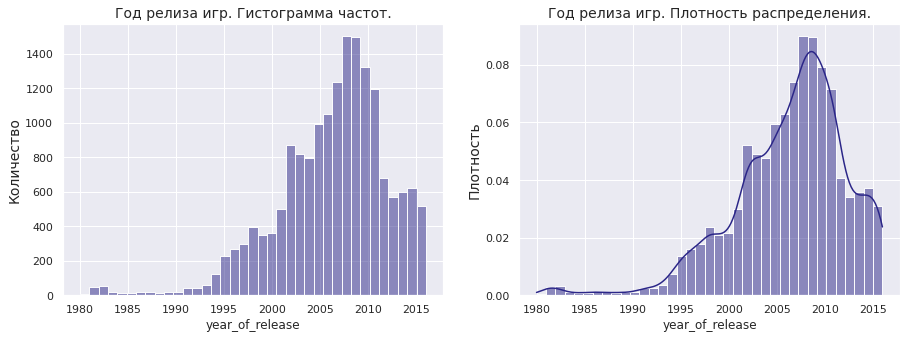

In [87]:
# отображение парных гистограмм по году релиза игр
pair_hists(df['year_of_release'], 'Год релиза игр', bins=37)

* На этапе предобработки данных мы уже отмечали, что до `1990` года игр было немного и эти наблюдения можно не учитывать в дальнейших исследованиях.
* Игровая индустрия развивается и меняется настолько быстро, что даже десятилетние данные могут быть уже не актуальны в настоящее время. Чтобы корректно провести анализ, необходимо определить **актуальный период** изучаемых данных. Для этого выполним следующее:
    * Выберем платформы с наибольшими суммарными продажами.
    * Построим распределения по годам и посмотрим как менялись продажи по выбранным платформам.
    * Установим характерный срок, в течение которого появляются новые и исчезают старые платформы. Чтобы максимально сократить попадание устаревающих игровых платформ в исследуемые данные, будем считать, что актуальный период будет равен половине этого срока.

Создадим вспомогательныё датафрейм с группировкой данных по платформам и подсчётом суммарных продаж во всех регионах для каждой платформы. Полученные данные отсортируем по убыванию значения суммарных продаж. Столбец `total_sales` переименуем в `total_sales_by_platform`.

In [88]:
# создание вспомогательного датафрейма с расчётом суммарных продаж во всех регионах для каждой платформы
sum_sales_by_platform = df[['total_sales', 'platform']].groupby('platform').agg({'total_sales': 'sum'})\
.sort_values(by = 'total_sales', ascending = False).rename(columns = {'total_sales':'total_sales_by_platfrom'})

# просмотр первых строк полученного датафрейма
display(sum_sales_by_platform.head(5))

,total_sales_by_platfrom
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12


Сохраним в переменную `top_20_platform` наименования первых 20 платформ (Топ-20) из отсортированного датафрема. Таким образом, получим наибольшие суммарные продажи по платформам.

In [89]:
# получение Топ-20 наименований платформ
top_20_platform = sum_sales_by_platform.iloc[:20, :].index

# проверим количество полученных наименований платформ
print(f'В результате отбора получили {len(top_20_platform)} наименований платформ.')

В результате отбора получили 20 наименований платформ.


Создадим ещё один вспомогательный датафрейм, в который отберём данные по продажам игр во всех регионах для платформ, которые вошли в Топ-20. Данные до `1991` года исключим из  рассмотрения.

In [90]:
# создание датафрейма с продажами игр по всем регионам для платформ из Топ-20
sales_by_top_20_platform = (
    df.loc[df['year_of_release'] > 1990]
    .query('platform in @top_20_platform')[['year_of_release', 'platform', 'total_sales']]
    .groupby(['platform', 'year_of_release'])
    .agg({'total_sales': 'sum'}).reset_index()
)

Построение графика распределения продаж игр во всех регионах по различным платформам из Топ-20. Чтобы избежать дублирования кода обернём построение подобного типа графиков во вспомогательную функцию.

In [91]:
# вспомогательная функция для построения линейных графиков
def multiline_plot(data, title, xlabel, ylabel, x_ticks = []):
    """
    input: data (pandas.Dataframe) - данные для построения линейных графиков
           title (str)             - наименование графика
           xlabel (str)            - подпись к оси X
           ylabel (str)            - подпись к оси Y
           x_ticks (numpy array)   - список меток для оси Х
    output: None
    description: Функция для построения линейных графиков для изучаемого параметра
    """
    plt.figure(figsize = (15, 8))
    plt.title(title, fontsize = 14)
    plt.xlabel(xlabel, fontsize = 13)
    plt.ylabel(ylabel, fontsize = 13)
    plt.xticks(x_ticks)
    sns.lineplot(data = data, y = 'total_sales', x = 'year_of_release', hue = 'platform', marker='o', linewidth = 2)
    plt.show();

Построим графики, используя созданную функцию `multiline_plot`.

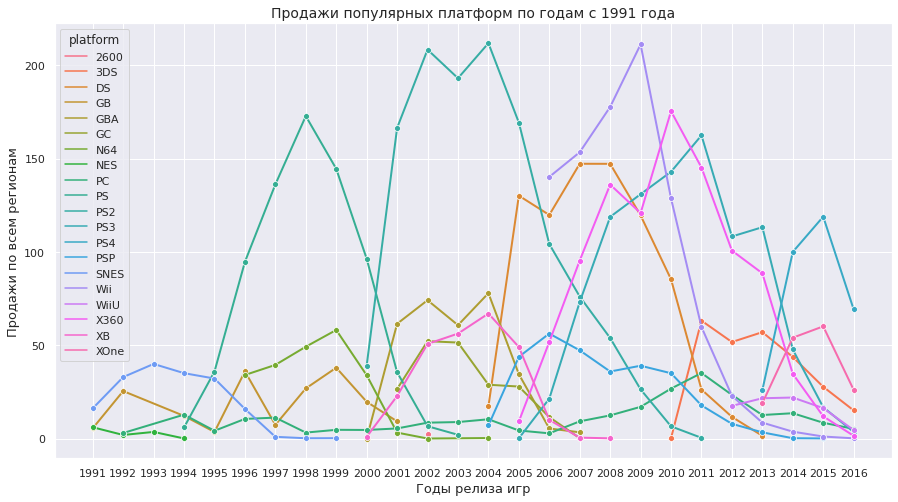

In [92]:
# построение графика суммарных продаж по всем регионам для популярных платформ из списка Топ-20
multiline_plot(sales_by_top_20_platform, 'Продажи популярных платформ по годам с 1991 года',\
               'Годы релиза игр', 'Продажи по всем регионам',
               x_ticks = sales_by_top_20_platform['year_of_release'].unique())

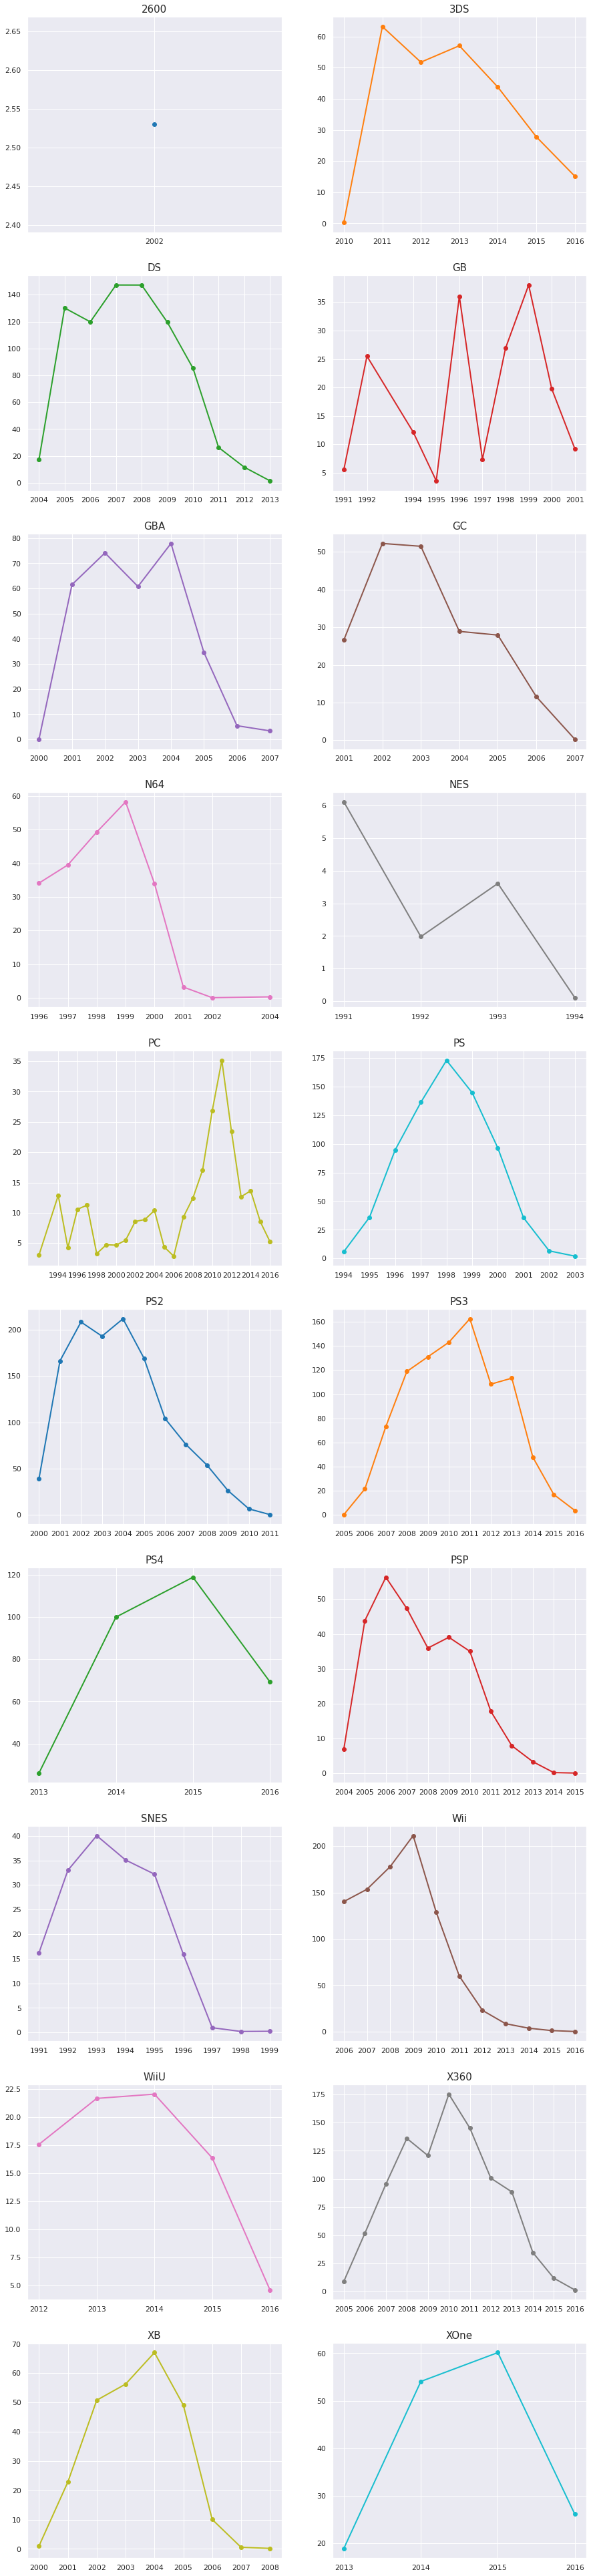

In [93]:
# раздельный вывод графиков
platforms = sales_by_top_20_platform['platform'].unique()
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 
          'blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']


fig, axs = plt.subplots(10, 2, figsize=(15,70))

a = b = 0

for i in range(20):
    if platforms[i] != 'PC':
        x_ticks = (
            sales_by_top_20_platform.loc[sales_by_top_20_platform['platform'] == f'{platforms[i]}']['year_of_release']
            .values
        )
    else:
        x_ticks = list(
            sales_by_top_20_platform.loc[sales_by_top_20_platform['platform'] == f'{platforms[i]}']['year_of_release']
            .values
        )[1::2]
    if i % 2 == 0:
        axs[a, b].plot(
            sales_by_top_20_platform.loc[sales_by_top_20_platform['platform'] == f'{platforms[i]}']['year_of_release']
            .values,
            sales_by_top_20_platform.loc[sales_by_top_20_platform['platform'] == f'{platforms[i]}']['total_sales'],
            f'tab:{colors[i]}',
            marker='o',
            linewidth=2
        )
        axs[a, b].set_title(f'{platforms[i]}', fontsize=15)
        plt.sca(axs[a, b])
        plt.xticks(x_ticks)
        b += 1
    else:    
        axs[a, b].plot(
            sales_by_top_20_platform.loc[sales_by_top_20_platform['platform'] == f'{platforms[i]}']['year_of_release']
            .values,
            sales_by_top_20_platform.loc[sales_by_top_20_platform['platform'] == f'{platforms[i]}']['total_sales'],
            f'tab:{colors[i]}',
            marker='o',
            linewidth=2
        )
        axs[a, b].set_title(f'{platforms[i]}', fontsize=15)
        plt.sca(axs[a, b])
        plt.xticks(x_ticks)
        a += 1
        b -= 1
plt.show();

На графике можно отметить важное наблюдение. Как только какая-либо игровая платформа после периода максимальных продаж и последующего их спада оказывается ниже линии платформы `PC` - это означает, что «жизненный» цикл этой платформы близок к завершению и она исчезнет с рынка в течение ближайших нескольких лет. На графике не наблюдается ни одной платформы которая бы демонстрировала иное поведение.

В остальном график перегружен информацией и его анализ затруднителен. Разделим платформы на две части и построим для них два отдельных графика.

In [94]:
# разделение списка платформ с наибольшими суммарными продажами на две части
top_20_first = top_20_platform[0:10]
top_20_second = top_20_platform[10:]

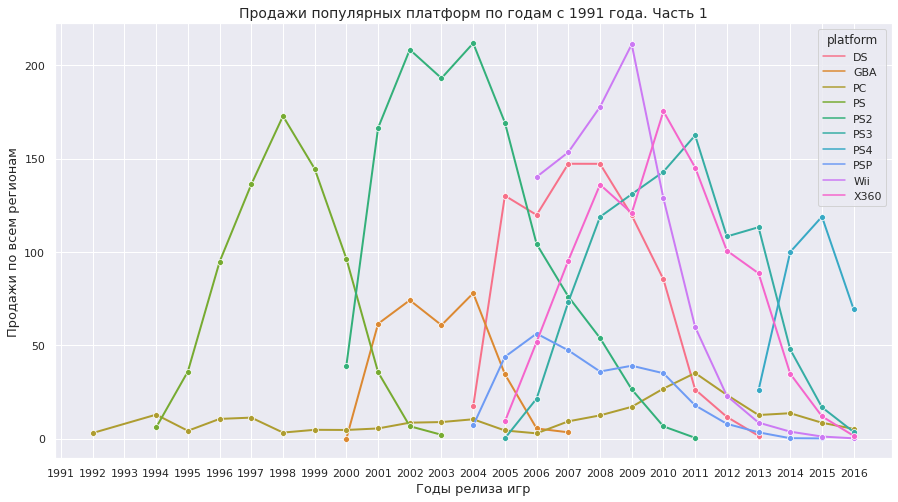

In [95]:
# построение графика суммарных продаж по всем регионам для популярных платформ из списка Топ-20 часть 1
multiline_plot(sales_by_top_20_platform.query('platform in @top_20_first'),\
               'Продажи популярных платформ по годам с 1991 года. Часть 1',\
               'Годы релиза игр', 'Продажи по всем регионам',
               x_ticks = sales_by_top_20_platform['year_of_release'].unique())

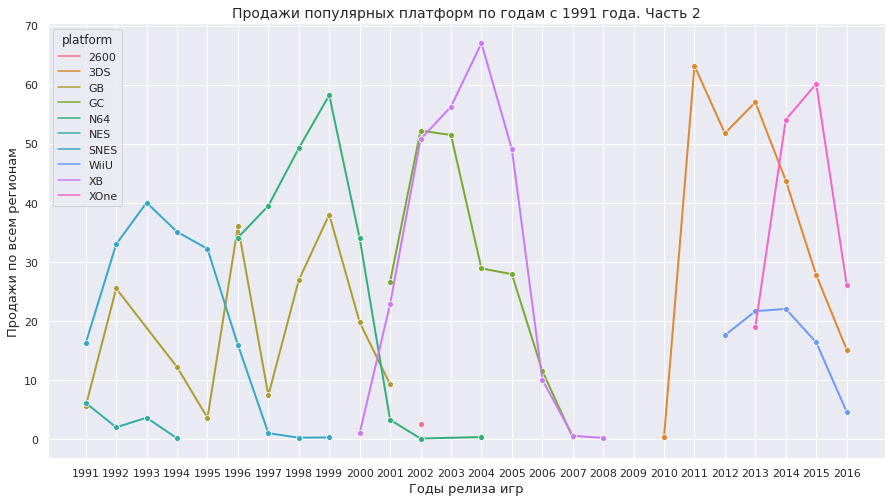

In [96]:
# построение графика суммарных продаж по всем регионам для популярных платформ из списка Топ-20 часть 2
multiline_plot(sales_by_top_20_platform.query('platform in @top_20_second'),\
               'Продажи популярных платформ по годам с 1991 года. Часть 2',\
               'Годы релиза игр', 'Продажи по всем регионам',
               x_ticks = sales_by_top_20_platform['year_of_release'].unique())

Разделённые графики проще анализировать на предмет выявления закономерностей по различным платформам, но на главный вопрос об определении актуального периода всё ещё сложно дать ответ. Поэтому вычислим его как среднее значение разницы годов, в которые платформы исчезали с рынка и годов, в которые соотвествующие платформы появлялись на нём. Таким образом, по сути, определим среднее время «жизни» платформ на рынке.

In [97]:
# вычисение разницы между годом ухода платформы с рынка и годом её первого появления на нём
diff = sales_by_top_20_platform.groupby('platform').agg({'year_of_release':'max'}) - \
sales_by_top_20_platform.groupby('platform').agg({'year_of_release':'min'})

# вычисление среднего значения
actual_full_period = round(diff['year_of_release'].mean())

print(f'Среднее время «жизни» игровых платформ на рынке составляет {actual_full_period} лет.')

Среднее время «жизни» игровых платформ на рынке составляет 8 лет.


Таким образом, принимаем продолжительность **актуального периода**, равной половине от полученного результата, то есть `4` года. Посмотрим какие платформы продавались за последние `4` года, то есть на актуальные для целей исследования платформы.

In [98]:
# получим список актуальных платформ 
actual_platforms = sales_by_top_20_platform.query('year_of_release > 2011')['platform'].unique()
print('Предварительный список актуальных платформ: ', actual_platforms)

Предварительный список актуальных платформ:  ['3DS' 'DS' 'PC' 'PS3' 'PS4' 'PSP' 'Wii' 'WiiU' 'X360' 'XOne']


Далее построим график продаж платформ за актуальный период, начиная с `2012` года. Верхнюю границу также ограничим `2015` годом, так за `2016` год данные могут быть неполными и из-за этого возможна неверная интерпретация снижения продаж по какой-либо платформе.

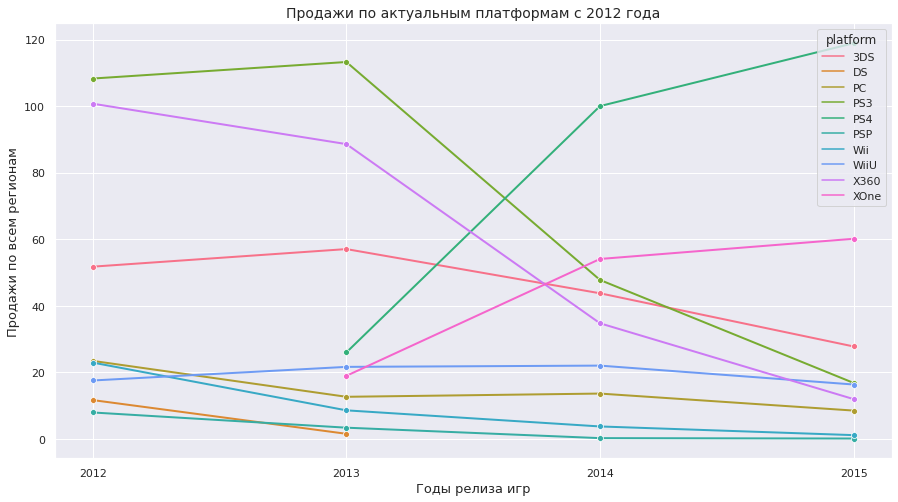

In [99]:
# сохраним в таблице данные о продажах игр различных платформ за актуальный период
actual_sales_by_platform = (
    sales_by_top_20_platform
    .query('platform in @actual_platforms and year_of_release > 2011 and year_of_release < 2016')
)

# построение графика продажи различных платформ за актуальный период
multiline_plot(actual_sales_by_platform,
               'Продажи по актуальным платформам с 2012 года',\
               'Годы релиза игр', 'Продажи по всем регионам',
               x_ticks = actual_sales_by_platform['year_of_release'].unique())

Всё платформы, продажи которых к границе `2015` года на графике оказались выше платформы `PC`, будем считать **актуальными платформами** для целей исследования. Получим все эти платформы в виде списка.

In [100]:
# получение значения суммарного количества продаж для платформы PC в 2015 году
pc_sale_in_2015 = sales_by_top_20_platform.query('year_of_release == 2015 and platform == "PC"')['total_sales'].values[0]
print(f'Суммарное количество продаж во всех регионах для платформы PC в 2015 году: {round(pc_sale_in_2015, 2)} млн.')


# получение финального списка актуальных платформ из датафрейма sales_by_top_20_platform 
# по условию total_sales >= pc_sale_in_2015
act_platforms = (
    sales_by_top_20_platform
    .query('platform in @actual_platforms and year_of_release == 2015 and total_sales >= @pc_sale_in_2015')['platform']
    .unique()
)

# выведем финальный список актуальных платформ
display(act_platforms)

Суммарное количество продаж во всех регионах для платформы PC в 2015 году: 8.52 млн.


array(['3DS', 'PC', 'PS3', 'PS4', 'WiiU', 'X360', 'XOne'], dtype=object)

* Установлено, что после того, как суммарные продажи по всем регионам по какой-либо платформе достигают максимальных значений, переходят к снижению и пересекают линию продаж платформы `PC` сверху вниз - это означает завершение «жизненного» цикла этих платформ. Следовательно, все платформы, продажи которых оказались меньше суммарных продаж платформы `PC` уже могут считаться неактуальными и они исчезнут с рынка в течение ближайших нескольких лет.
* Рассчитано среднее время «жизни» игровых платформ на рынке, которое составило `8 лет`.
* **Актуальным периодом** для целей исследования принята продолжительность половины срока «жизни» игровых платформ на рынке, то есть `4 года`.
* **Актуальными платформами** для исследования на `2017` год признаны: `3DS`, `PC`, `PS3`, `PS4`, `WiiU`, `X360` и `XOne`.
* Игровые платформы `PS4` и `XOne` появились на рынке в `2013` году, набирают популярность у пользователей и являются потенциально наиболее прибыльными. Наблюдаемый на графиках этих платформ спад в `2016` году по отношению к `2015`, может говорить о том, что на момент выгрузки данных `2016` год ещё не был завершен и значительная часть данных не вошла в выборку.
* Игровые платформы `3DS`, `PS3`, `WiiU` и `X360`, судя по снижению продаж во всех регионах, находятся в завершающей фазе своего «жизненного» цикла.
* Игровая платформа `PC` является своего рода «долгожителем», она уже «пережила» многие платформы и держится на стабильно невысоком уровне продаж. В значительной мере это обусловлено тем, что персональные компьютеры не являются таким узконаправленным продуктом как игровые приставки и сфера их применения не заканчивается на играх.

### Исследование продаж по актуальным платформам

Выполним срез из табличных данных, чтобы они соотвествовали определённым выше характеристикам:
* **Актуальный период** от 2012 года и далее;
* **Актуальные платформы** для исследования: `3DS`, `PC`, `PS3`, `PS4`, `WiiU`, `X360` и `XOne`.

In [101]:
# выполнение среза и сохранение данных в датафреймм df_actual
df_actual = df.query('platform in @act_platforms and year_of_release >= 2012')

Построим для отобранных данных графики «ящик с усами» по глобальным продажам игр в разбивке по платформам. Для лучшей визуализации и выявления закономерностей предварительно отсортируем и сохраним в переменную `sales_by_platform_sorted` список платформ в порядке убывания их медианных значений.

In [102]:
# получение отсортированного списка игровых платформ в порядке убывания медианных значений по их суммарным продажам
sales_by_platform_sorted = (
    df_actual
    .groupby('platform')['total_sales']
    .agg('median')
    .sort_values(ascending = False)
    .index
)

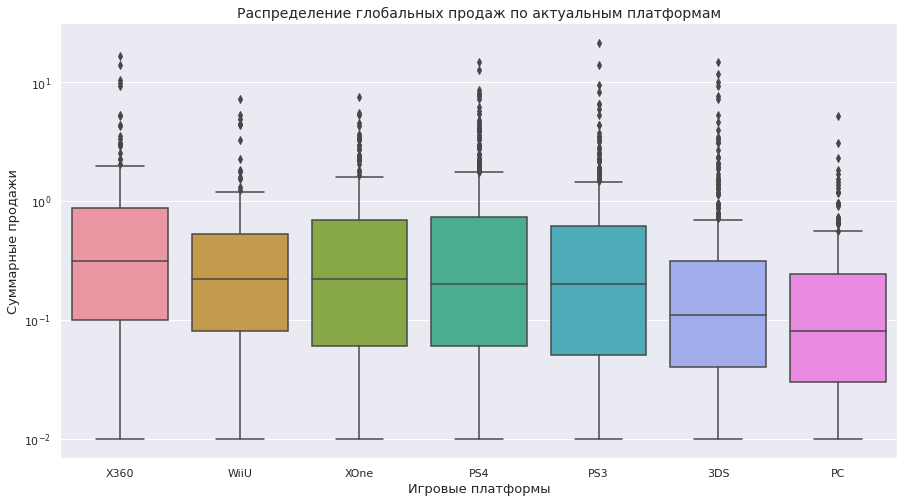

In [103]:
# построение графиков распределений глобальных продаж по актуальным платформам с помощью метода boxplot() 
# с их сортировкой по медианным значениям через передачу соответствующего параметра в order
# для лучшей визуализации из-за длинных правых хвостов в данных построение произведём в логарифмической шкале
plt.figure(figsize = (15, 8))
ax = sns.boxplot(data = df_actual, y = 'total_sales', x = 'platform', order = sales_by_platform_sorted)
ax.set_title('Распределение глобальных продаж по актуальным платформам', fontsize = 14)
ax.set_xlabel('Игровые платформы', fontsize = 13)
ax.set_ylabel('Суммарные продажи', fontsize = 13)
ax.set(yscale = 'log')
plt.show();

In [104]:
# посмотрим на основные описательные статистики данных по игровым платформам
df_actual.pivot_table(index=['game_name'], columns='platform', values='total_sales').describe()

platform,3DS,PC,PS3,PS4,WiiU,X360,XOne
count,402.000000,255.000000,493.000000,392.000000,147.000000,294.000000,247.000000
mean,0.486269,0.249059,0.585041,0.801378,0.559116,0.807891,0.645020
std,1.377470,0.490149,1.460332,1.609456,1.058836,1.706880,1.036139
min,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
25%,0.040000,0.030000,0.050000,0.060000,0.080000,0.100000,0.060000
50%,0.110000,0.080000,0.200000,0.200000,0.220000,0.310000,0.220000
75%,0.310000,0.240000,0.610000,0.730000,0.525000,0.870000,0.685000
max,14.600000,5.140000,21.050000,14.630000,7.090000,16.270000,7.390000


* Распределения глобальных продаж игр для всех платформ характеризуются длинными правыми хвостами. Это означает, что для всех платформ существуют очень популярные у пользователей игры, счёт продаж по которыми исчисляется многими миллионами. Именно они и создают значительное смещение данных вправо.
* Медианные значения суммарных продаж у платформ `WiiU`, `XOne`, `PS4` и `PS3` практически одинаковы.

### Влияние на продажи отзывов пользователей и критиков

Посмотрим, как влияют на продажи отзывы пользователей и критиков внутри одной из потенциально наиболее прибыльных платформ `PS4`. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Предварительно создадим соотвествующий решаемой задаче срез данных.

In [105]:
# получение среза данных по платформе PS4 и вывод первых строк из полученного датафрейма
df_ps4 = df_actual.loc[df_actual['platform'] == 'PS4']
display(df_ps4.head(5))

,game_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


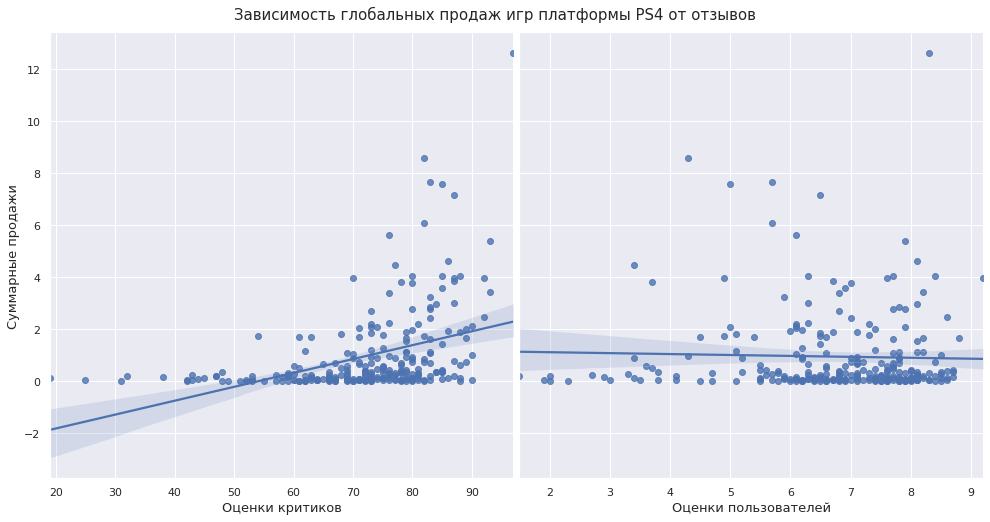

In [106]:
# построение парного графика рассеяния с помощью метода pairplot() из библиотеки seaborn
sns.set()
ax = sns.pairplot(df_ps4, x_vars = ['critic_score', 'user_score'], y_vars = ['total_sales'], height = 7, kind = 'reg')
ax.fig.suptitle('Зависимость глобальных продаж игр платформы PS4 от отзывов', y = 1.03, size = 15)
ax.axes[0, 0].xaxis.set_label_text('Оценки критиков', fontsize = 13)
ax.axes[0, 1].xaxis.set_label_text('Оценки пользователей', fontsize = 13)
ax.axes[0, 0].yaxis.set_label_text('Суммарные продажи', fontsize = 13)
plt.show();

Перед расчётом корреляции между отзывами критиков и пользователей с продажами построим тепловую карту для этих параметров с помощью метода *heatmap()*.

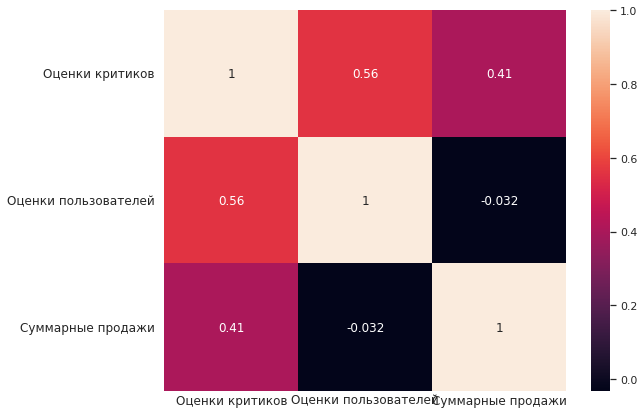

In [107]:
# построение тепловой карты для оценки корреляции между отзывами и продажами
# с помощью метода heatmap() из библиотеки seaborn
plt.figure(figsize = (9, 7))
ax = sns.heatmap(
    df_ps4[['critic_score', 'user_score', 'total_sales']].corr(), 
    annot = True)
ax.set_xticklabels(
    ('Оценки критиков', 'Оценки пользователей', 'Суммарные продажи'), fontsize = '12', va = 'center')
ax.set_yticklabels(
    ('Оценки критиков', 'Оценки пользователей', 'Суммарные продажи'), rotation = 0, fontsize = '12', va = 'center')
plt.show();

Также дополнительно отразим корреляцию между этими величинами в табличном виде.

In [108]:
# вывод коэффициентов корреляции между отзывами и продажами в виде таблицы
display(df_ps4[['critic_score', 'user_score', 'total_sales']].corr())

,critic_score,user_score,total_sales
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
total_sales,0.406568,-0.031957,1.000000


Проверим какое влияние на величину корреляции оказывают выбросы. Для этого отсечём все значения суммарных продаж, которые находятся за пределом границы верхнего уса. Рассчитаем это значение.

In [109]:
# расчёт значения верхней границы значений продаж по всем регионам
max_total_sales_ps4 = df_ps4['total_sales'].describe()['75%'] + \
(df_ps4['total_sales'].describe()['75%'] - df_ps4['total_sales'].describe()['25%']) * 1.5
display(round(max_total_sales_ps4, 2))

1.74

In [110]:
# вывод коэффициентов корреляции между отзывами и продажами в данных без выбросов в виде таблицы
display(df_ps4.loc[df_ps4['total_sales'] <= 1.74][['critic_score', 'user_score', 'total_sales']].corr())

,critic_score,user_score,total_sales
critic_score,1.000000,0.628491,0.272624
user_score,0.628491,1.000000,0.011444
total_sales,0.272624,0.011444,1.000000


Определим коэффициенты корреляции для остальных игровых платформ.

In [111]:
# определение коэффициентов корреляции для остальных платформ
(
    df_actual
    .groupby('platform')[['critic_score', 'user_score', 'total_sales']]
    .agg('corr').reset_index()
    .query('level_1 == "total_sales"')
    .reset_index(drop = True)
    .iloc[[0, 1, 2, 4, 5, 6], [0, 2, 3]]
)

,platform,critic_score,user_score
0,3DS,0.323378,0.203735
1,PC,0.240570,-0.120339
2,PS3,0.331371,-0.005043
4,WiiU,0.348380,0.400219
5,X360,0.360266,0.006315
6,XOne,0.416998,-0.068925


* Выбросы в данных оказывают заметное влияние на значение корреляции между оценками критиков и суммарными глобальными продажами для платформы `PS4`. Значение корреляции равное `0.41` соответствовало умеренной силе корреляционной связи, а после удаления выбросов оно стало соотвествовать значению `0.27` - слабой силе корреляционной связи. Исходя из того, что в выбросы попадают наиболее популярные игры, можно предположить, что популярность игры у пользователей оказывает влияние на её оценки со стороны критиков.
* Для остальных платформ сила корреляции оценок критиков и суммарных продаж также умеренная, а для платформы `PC` со значением `0.24` она определена как слабая.
* Сила корреляции между оценками пользователей и суммарными продажами для всех платформ слабая, кроме платформы `WiiU`, для которой она согласно коэффициенту корреляции, равному `0.40`, умеренная.

### Влияние жанра игр на продажи

Построим графики типа «ящик с усами» по глобальным продажам игр в разбивке по игровым жанрам. Для лучшей визуализации и выявления закономерностей предварительно отсортируем и сохраним в переменную `sales_by_genre_sorted` список игровых жанров в порядке убывания их медианных значений по глобальным продажам.

In [112]:
# получение отсортированного списка жанров игр в порядке убывания медианных значений по их суммарным продажам
sales_by_genre_sorted = (
    df_actual
    .groupby('genre')['total_sales']
    .agg('median')
    .sort_values(ascending = False)
    .index
)

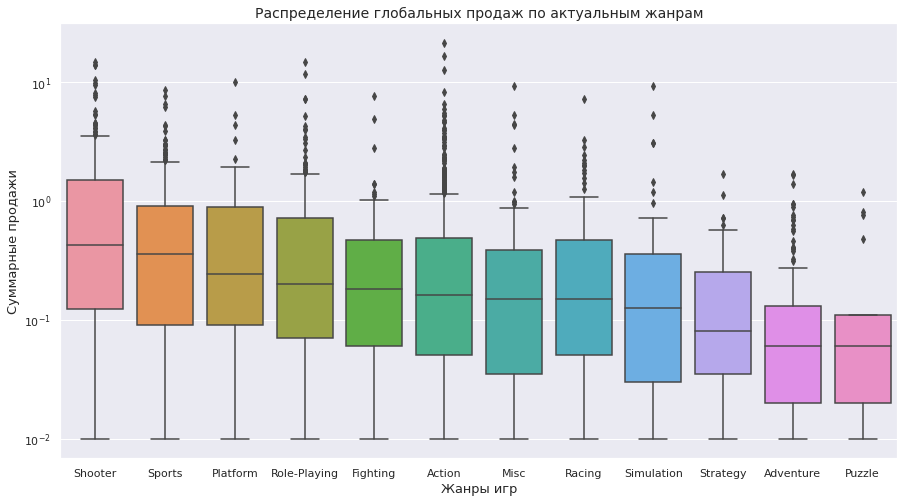

In [113]:
# построение графиков распределений глобальных продаж по жанрам игр с помощью метода boxplot() 
# с их сортировкой по медианным значениям через передачу соответствующего параметра в order
# для лучшей визуализации из-за длинных правых хвостов в данных построение произведём в логарифмической шкале
plt.figure(figsize = (15, 8))
ax = sns.boxplot(data = df_actual, y = 'total_sales', x = 'genre', order = sales_by_genre_sorted)
ax.set_title('Распределение глобальных продаж по актуальным жанрам', fontsize = 14)
ax.set_xlabel('Жанры игр', fontsize = 13)
ax.set_ylabel('Суммарные продажи', fontsize = 13)
ax.set(yscale = 'log')
plt.show();

In [114]:
# посмотрим на основные описательные статистики данных по жанрам игр
df_actual.pivot_table(index=['game_name'], columns='genre', values='total_sales').describe()

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
count,418.000000,101.000000,52.000000,101.000000,43.000000,17.000000,43.000000,190.000000,93.000000,59.000000,96.000000,47.000000
mean,0.397557,0.137056,0.379984,0.311386,1.052787,0.224804,0.683155,0.631591,1.165249,0.500243,0.563375,0.193121
std,0.850759,0.269920,0.874028,0.676784,1.801024,0.357842,1.240002,1.560912,1.732246,1.435911,0.652074,0.309563
min,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.023333,0.010000,0.010000,0.010000,0.010000,0.010000
25%,0.030833,0.020000,0.073750,0.030000,0.103333,0.020000,0.083667,0.060000,0.110000,0.030000,0.125625,0.025000
50%,0.118333,0.040000,0.150000,0.110000,0.260000,0.056667,0.196667,0.180000,0.405000,0.110000,0.303000,0.070000
75%,0.389000,0.104000,0.391250,0.290000,1.340000,0.110000,0.841500,0.577500,1.430000,0.222500,0.761250,0.235833
max,11.316000,1.660000,6.210000,4.440000,9.900000,1.190000,7.090000,14.600000,9.710000,9.170000,3.260000,1.670000


* Для распределний глобальных продаж по жанрам также наблюдаются длинные правые хвосты. Судя по всему, это является характерной особенностью данного датафрейма, которая не зависит от того, в каком разрезе анализируются данные.
* Самым популярным у пользователей жанром является `Shooter`. Немного менее популярна группа из трёх видов жанров `Sports`, `Platform` и `Role-Playing` с примерно одинаковыми распределениями. Именно на игры этих четырёх жанров следует направить внимание, планируя продвижение и рекламные компании.
* Наименее популярны у пользователей игры жанров `Strategy`, `Adventure` и `Puzzle`.
* Средние позиции у  жанров `Fighting`, `Action`, `Misc`, `Racing` и `Simulation`.

### Выводы по анализу данных

* Данные до `1990` года включительно определены как редкие и полностью устаревшие. Они удалены из анализируемых данных.
* Рассчитано среднее время «жизни» игровых платформ на рынке, которое составило **`8 лет`**. Актуальный период определён как половина данного срока, то есть **`4`** года. Таким образом, актуальный период в исследуемых данных соотвествует **`2012-2016`** гг.
* Выявлено наблюдение, что как только график суммарных продаж какой-либо из платформ пересекает линию графика платформы `PC` сверху вниз - это явный сигнал к тому, что «жизненный» цикл этих платформ истекает и они исчезнут с рынка в ближайшие годы.
* Исходя из предыдущего наблюдения, актуальнымми плаформами признаны те из них, график суммарных продаж которых в 2015 году находился выше аналогичного графика платформы `PC`. Кроме самой платформы `PC`, актуальными платформами для целей исследования признаны `3DS`, `PS3`, `PS4`, `WiiU`, `X360` и `XOne`.
* Потенциально наиболее прибыльными признаны появившиеся на рынке в `2013` году и набирающие популярность у пользователей игровые платформы `PS4` и `XOne`. Продажи платформ `3DS`, `PS3`, `WiiU` и `X360` падают, и судя по тому, что графики их суммарных продаж к `2015` году оказались в непосредственной близости от графика платформы `PC`, данные платформы находятся в завершающей фазе своего «жизненного» цикла.
* Продажи игр для платформы `PC` по сравнению с другими платформами достаточно стабильны на всём промежутке исследуемых данных.
* Исследование распределения глобальных продаж по платформам показало, что для всех платформ существуют очень популярные у пользователей игры продажи которых исчисляются миллионами копий. За счёт этого средние значения продаж для всех платформ значительно превышают медианные, распределения этих данных характеризуются значительными смещениями вправо и длинными правыми хвостами.
* Рассмотрено влияние отзывов пользователей и критиков на продажи игр для платформы `PS4`. Рассчитаны коэффициенты корреляции между продажами и оценками для всех платформ.
    * Для всех актуальных платформ сила корреляции оценок критиков и суммарных продаж определена как умеренная, кроме платформы `PC` для которой со значением, равным **`0.24`**, она установлена как слабая.
    * Сила корреляции между оценками пользователей и суммарными продажами для всех актуальных платформ слабая, кроме платформы `WiiU`, для которой согласно коэффициенту корреляции, равному **`0.40`**, она умеренная.
* Изучено влияние жанра компьютерных игр на продажи.
    * Распределения глобальных продаж по жанрам также характеризуются наличием значительного количества выбросов, образующих в распределении данных длинные правые хвосты.
    * Самым популярным у пользователей жанром является `Shooter` (медианное значение продаж **`0.40`** млн. копий). Немного отстают жанры `Sports`, `Platform` и `Role-Playing` (медианное значение продаж **`0.18 - 0.30`** млн. копий по всем этим платформам).
    * Средние позиции у  жанров `Fighting`, `Action`, `Misc`, `Racing` и `Simulation` (медианное значение продаж для этой группы находятся в диапазоне **`0.11 - 0.15`** млн. копий).
    * Наименее популярны у пользователей игры жанров `Strategy`, `Adventure` и `Puzzle` (медианное значение продаж **`0.06 - 0.07`** млн. копий по всем платформам).

## Изучение портрета пользователей по регионам

Изучим портрет пользователей компьютерных игр в основных регионах (NA, EU, JP). Для этого выполним следующее:
* Определим самые популярные (Топ-5) платформы в регионах и опишем различия в долях их продаж.
* Самые популярные жанры (Топ-5) в основных регионах.
* Изучим влияние рейтинга ESRB на продажи в отдельном регионе.

### Определение популярных платформ по регионам

Для определения самых популярных (Топ-5) платформ в основных регионах (NA, EU, JP) необходимо вычислить доли продаж каждой из платформ в отдельно взятом регионе как отношение количества продаж одной платформы в данном регионе к общему для всех платформ этого региона количеству продаж.

Определим наиболее популярные платформы для региона Северная Америка.

In [115]:
# определение Топ-5 игровых платформ для рынка Северной Америки
top_5_platforms_na = (
    df_actual.groupby('platform')
    .agg({'na_sales': 'sum'})
    .apply(lambda x: round(x / x.sum(), 4))
    .sort_values(by = 'na_sales', ascending = False)
    .rename(columns={'na_sales': 'platforms_na_rating'})
    .reset_index()
    .iloc[:5, :]
    .set_index('platform')
)

display(top_5_platforms_na)

,platforms_na_rating
platform,
X360,0.2513
PS4,0.1944
PS3,0.1854
XOne,0.1665
3DS,0.0999


Определим наиболее популярные платформы для европейского региона.

In [116]:
# определение Топ-5 игровых платформ для рынка Европы
top_5_platforms_eu = (
    df_actual.groupby('platform')
    .agg({'eu_sales': 'sum'})
    .apply(lambda x: round(x / x.sum(), 4))
    .sort_values(by = 'eu_sales', ascending = False)
    .rename(columns={'eu_sales': 'platforms_eu_rating'})
    .reset_index()
    .iloc[:5, :]
    .set_index('platform')
)

display(top_5_platforms_eu)

,platforms_eu_rating
platform,
PS4,0.2932
PS3,0.2229
X360,0.1556
XOne,0.1072
3DS,0.0890


Определим наиболее популярные платформы для региона Япония.

In [117]:
# определение Топ-5 игровых платформ для рынка Японии
top_5_platforms_jp = (
    df_actual.groupby('platform')
    .agg({'jp_sales': 'sum'})
    .apply(lambda x: round(x / x.sum(), 4))
    .sort_values(by = 'jp_sales', ascending = False)
    .rename(columns={'jp_sales': 'platforms_jp_rating'})
    .reset_index()
    .iloc[:5, :]
    .set_index('platform')
)

display(top_5_platforms_jp)

,platforms_jp_rating
platform,
3DS,0.5703
PS3,0.2292
PS4,0.1036
WiiU,0.0845
X360,0.0102


Для наглядности отобразим полученные результаты на круговых диаграммах. Так как подобные графики потребуется построить ещё дважды, создадим вспомогательную функцию `show_pies`, чтобы избежать дублирования кода.

In [118]:
def show_pies(fig_title, data_1, data_2, data_3, labels_1, labels_2, labels_3):
    """
    input: fig_title (str)        - общее наименование графика
           data_1 (pandas.Series) - первая группа анализируемых данных
           data_2 (pandas.Series) - вторая группа анализируемых данных
           data_3 (pandas.Series) - третья группа анализируемых данных
           labels_1 (str)         - подпись к первому графику
           labels_2 (str)         - подпись ко второму графику
           labels_3 (str)         - подпись к третьему графику
    output: None
    description: Функция для построения круговых диаграмм для изучаемого параметра
    """
    fig = plt.figure(figsize = (15, 5))
    fig.suptitle(fig_title, fontsize = 18)
    
    ax1 = plt.subplot(131)
    plt.pie(data_1, labels = labels_1, normalize = True)
    ax1.set_title('NA', fontsize = 15)
    
    ax2 = plt.subplot(132)
    plt.pie(data_2, labels = labels_2, normalize = True)
    ax2.set_title('EU', fontsize = 15)
    
    ax3 = plt.subplot(133)
    plt.pie(data_3, labels = labels_3, normalize = True)
    ax3.set_title('JP', fontsize = 15)
    
    plt.show();

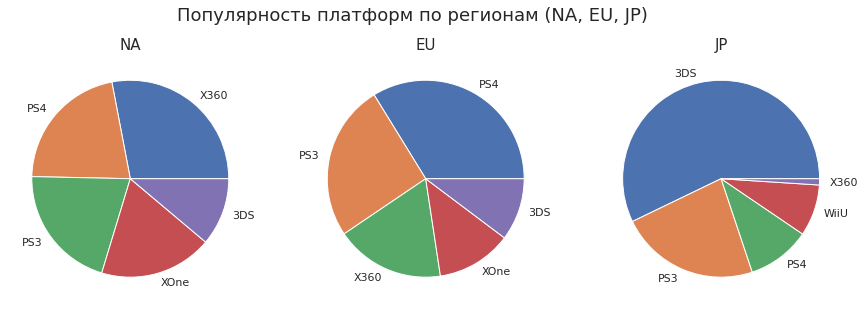

In [119]:
# построение круговых диаграмм для отображения популярных платформ по регионам (NA, EU, JP)
show_pies('Популярность платформ по регионам (NA, EU, JP)',
         top_5_platforms_na['platforms_na_rating'],
         top_5_platforms_eu['platforms_eu_rating'],
         top_5_platforms_jp['platforms_jp_rating'],
         top_5_platforms_na.index,
         top_5_platforms_eu.index,
         top_5_platforms_jp.index
         )

* В Топ-5 для рынков Северной Америки и Европы входят одни и те же игры, но в различных пропорциях. Почти `50%` рынка в Северной Америке занимают продажи игр для платформ `PS4` и `X360`, в то время как в Европе более `50%` рынка за двумя поколениями игровых консолей `PS3` и `PS4` от компании `Sony`.
* В Японии более `50%` рынка занимает одна единственная платформа - `3DS` от `Nintendo`. По всей видимости в Японии отдают предпочтение компактным игровым устройствам.

### Определение популярных жанров по регионам

Для определения самых популярных (Топ-5) жанров в основных регионах (NA, EU, JP) необходимо вычислить доли продаж каждого из жанров в отдельно взятом регионе как отношение количества продаж одного жанра в данном регионе к общему для всех жанров этого региона количеству продаж.

Определим наиболее популярные жанры для региона Северная Америка.

In [120]:
# определение Топ-5 игровых жанров для рынка Северной Америки
top_5_genres_na = (
    df_actual.groupby('genre')
    .agg({'na_sales': 'sum'})
    .apply(lambda x: round(x / x.sum(), 4))
    .sort_values(by = 'na_sales', ascending = False)
    .rename(columns={'na_sales': 'genres_na_rating'})
    .reset_index()
    .iloc[:5, :]
    .set_index('genre')
)

display(top_5_genres_na)

,genres_na_rating
genre,
Action,0.3014
Shooter,0.2572
Sports,0.1418
Role-Playing,0.1046
Misc,0.0513


Определим наиболее популярные жанры для европейского региона.

In [121]:
# определение Топ-5 игровых жанров для рынка Европы
top_5_genres_eu = (
    df_actual.groupby('genre')
    .agg({'eu_sales': 'sum'})
    .apply(lambda x: round(x / x.sum(), 4))
    .sort_values(by = 'eu_sales', ascending = False)
    .rename(columns={'eu_sales': 'genres_eu_rating'})
    .reset_index()
    .iloc[:5, :]
    .set_index('genre')
)

display(top_5_genres_eu)

,genres_eu_rating
genre,
Action,0.3169
Shooter,0.2341
Sports,0.1392
Role-Playing,0.0945
Racing,0.0547


Определим наиболее популярные жанры для региона Япония.

In [122]:
# определение Топ-5 игровых жанров для рынка Японии
top_5_genres_jp = (
    df_actual.groupby('genre')
    .agg({'jp_sales': 'sum'})
    .apply(lambda x: round(x / x.sum(), 4))
    .sort_values(by = 'jp_sales', ascending = False)
    .rename(columns={'jp_sales': 'genres_jp_rating'})
    .reset_index()
    .iloc[:5, :]
    .set_index('genre')
)

display(top_5_genres_jp)

,genres_jp_rating
genre,
Role-Playing,0.3274
Action,0.2730
Simulation,0.0664
Shooter,0.0592
Misc,0.0588


Для наглядности отобразим полученные результаты на круговых диаграммах.

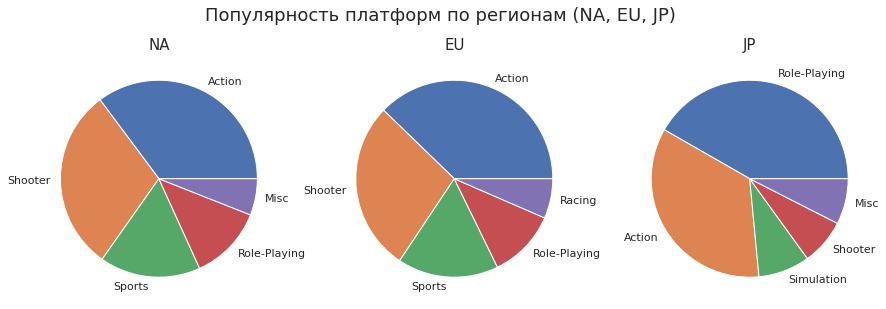

In [123]:
# построение круговых диаграмм для отображения популярных жанров по регионам (NA, EU, JP)  
show_pies('Популярность платформ по регионам (NA, EU, JP)',
         top_5_genres_na['genres_na_rating'],
         top_5_genres_eu['genres_eu_rating'],
         top_5_genres_jp['genres_jp_rating'],
         top_5_genres_na.index,
         top_5_genres_eu.index,
         top_5_genres_jp.index
         )

* В первые четыре места Топ-5 для рынков Северной Америки и Европы входят в примерно одинаковых пропорциях одни и те же жанры: `Shooter`, `Action`, `Sports` и `Role-Playing`. Лишь на последнем месте в Топ-5 в Европе находится жанр `Racing` вместо `Misc` в Северной Америке.
* Предпочтения по жанрам в Японии снова отличаются от Северной Америки и Европы. Первые два места в Топ-5 с примерно одинаковыми долями там занимают жанры `Role-Playing` и `Action`. Оставшиеся места равномерно распределены между жанрами `Simulation` (который не вошёл в топы других регионов), `Shooter` и `Misc`.

### Определение влияния рейтинга ESRB на продажи по регионам

Для определения влияния рейтинга ESRB на продажи в отдельных регионах (NA, EU, JP) необходимо вычислить доли продаж игр из каждой категории рейтинга в отдельно взятом регионе как отношение количества продаж одной категории рейтинга в данном регионе к общему количеству продаж для всех категорий рейтинга этого региона.

Определим доли категорий рейтина ESRB в продажах игр для региона Северная Америка.

In [124]:
# определение долей различных категорий рейтинга ESRB для рынка Северной Америки
ratings_na = (
    df_actual.groupby('rating')
    .agg({'na_sales': 'sum'})
    .apply(lambda x: round(x / x.sum(), 4))
    .sort_values(by = 'na_sales', ascending = False)
    .rename(columns={'na_sales': 'na_ratings'})
)

display(ratings_na)

,na_ratings
rating,
M,0.4929
E,0.2360
T,0.1373
E10+,0.1338


Определим доли категорий рейтина ESRB в продажах игр для региона Европа.

In [125]:
# определение долей различных категорий рейтинга ESRB для рынка Европы
ratings_eu = (
    df_actual.groupby('rating')
    .agg({'eu_sales': 'sum'})
    .apply(lambda x: round(x / x.sum(), 4))
    .sort_values(by = 'eu_sales', ascending = False)
    .rename(columns={'eu_sales': 'eu_ratings'})
)

display(ratings_eu)

,eu_ratings
rating,
M,0.4857
E,0.2698
T,0.1293
E10+,0.1153


Определим доли категорий рейтина ESRB в продажах игр для региона Европа.

In [126]:
# определение долей различных категорий рейтинга ESRB для рынка Японии
ratings_jp = (
    df_actual.groupby('rating')
    .agg({'jp_sales': 'sum'})
    .apply(lambda x: round(x / x.sum(), 4))
    .sort_values(by = 'jp_sales', ascending = False)
    .rename(columns={'jp_sales': 'jp_ratings'})
)

display(ratings_jp)

,jp_ratings
rating,
E,0.3627
T,0.2721
M,0.2621
E10+,0.1031


Для наглядности отобразим полученные результаты на круговых диаграммах. 

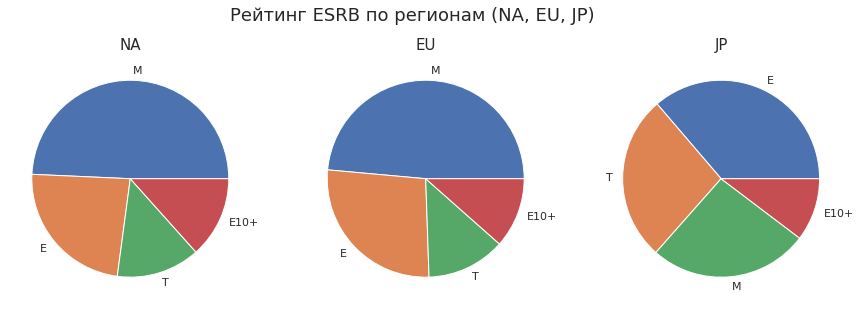

In [127]:
# построение круговых диаграмм для отображения долей рейтина ESRB в продажах по отдельным регионам (NA, EU, JP)  
show_pies('Рейтинг ESRB по регионам (NA, EU, JP)',
         ratings_na['na_ratings'],
         ratings_eu['eu_ratings'],
         ratings_jp['jp_ratings'],
         ratings_na.index,
         ratings_eu.index,
         ratings_jp.index
         )

* В регионах Северной Америки и Европы почти `50%` рынка занимают игры с рейтингом ESRB `M` - «Mature» (от 17 лет). На втором месте с примерно равными долями игры категории `E` - «Everyone» (от 6 лет). Два последних места занимают также с примерно равными долями игры с рейтингами `T` - «Teen» (от 13 лет) и `E10+` «Everyone 10 and older» (от 10 лет).
* В Японии всё несколько иначе. Первый три места с примерно равными долями занимают игры `M` - «Mature» (от 17 лет), `E` - «Everyone» (от 6 лет) и `T` - «Teen» (от 13 лет). И на последнем месте `E10+` «Everyone 10 and older» (от 10 лет).

### Выводы по изучению портрета пользователей

* Изучены самые популярные (Топ-5) платформы для каждого региона (NA, EU, JP).
    * Для рынков Северной Америки и Европы самыми популярными платформами стали `PS3`, `PS4` и `X360`.
    * Для рынка Японии первая тройка популярных игр выглядит следующим образом: `3DS`, `PS3` и `PS4`.
* Определены самые популярные (Топ-5) жанры в каждом регионе (NA, EU, JP).
    * Для рынков Северной Америки и Европы самыми популярными жанрами стали `Shooter`, `Action` и `Sports`.
    * Для рынка Японии можно выделить только два наиболее популярных жанра: `Role-Playing` и `Action`. Игры остальных проанализированных жанров занимают одинаково невысокую долю на рынке.
* Установлено влияние рейтинга ESRB на продажи в отдельных регионах.
    * Для рынков Северной Америки и Европы долю рынка немного меньшую, чем `50%` занимают игры возрастной категории `M` - «Mature» (от 17 лет). На втором месте с примерно `25%` долей игры с рейтингом `E` - «Everyone» (от 6 лет).
    * Для рынка Японии первые три места с примерно равными долями занимают игры с рейтингами `M` - «Mature» (от 17 лет), `E` - «Everyone» (от 6 лет) и `T` - «Teen» (от 13 лет).
* Отличия портрета пользователей по региону Япония от Европы и Северной Америки можно объяснить традиционной самобытностью японской культуры, которая влияет на все сферы жизни общества, в том числе и на игровую индустрию. Это выражается ещё и в том, что в Японии много игр создаются исключительно для внутреннего рынка, что и обуславливает наблюдаемые различия.
* В процессе анализа данных были выделены две потенциально прибыльные платформы - `PS4` и `XOne`. Платформа `PS4` подтвердила свою популярность у пользователей, заняв в рейтингах следующие места: `NA` - `2` место, `EU` - `1` место, `JP` - `3` место. С платформой `XOne` всё не так однозначно, так как в рейтингах она расположилась следующим образом: `NA`, `EU` - `4` место, а в рейтинг по `JP` она вообще не вошла.
* Исходя из предыдущего пункта, интернет-магазину «Стримчик», кроме платформ `PS4` и `XOne`, следует также учитывать сохраняющуюся популярность платформ `PS3` и `X360`, а на рынке Японии обязательно продвигать игры платформы `3DS`, которая в данном регионе занимает первое место в рейтинге среди всех платформ.

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем нулевую гипотезу H<sub>0</sub>:
* Средние пользовательские рейтинги платформ `XOne` и `PC` одинаковые.

Альтернативная гипотеза H<sub>1</sub>:
* Средние пользовательские рейтинги платформ `XOne` и `PC` различаются.

Для проверки гипотезы определим пороговое значение уровня значимости `alpha = 0.05`, сформируем соотвествующие выборки и сравним их средние t-тестом с помощью функции `st.ttest_ind`, так как выборки независимые.

In [128]:
# сформируем выборку пользовательских рейтингов для платформы XOne
user_scores_xone = (
    df_actual.loc[(df_actual['user_score'].notna()) & (df_actual['platform'] == 'XOne')]['user_score']
)

# сформируем выборку пользовательских рейтингов для платформы PC
user_scores_pc = (
    df_actual.loc[(df_actual['user_score'].notna()) & (df_actual['platform'] == 'PC')]['user_score']
)

In [129]:
# проверим размеры каждой из созданных выборок
print(f'Размер выборки для платформы XOne: {user_scores_xone.shape[0]}') 
print(f'Размер выборки для платформы PC: {user_scores_pc.shape[0]}')

Размер выборки для платформы XOne: 182
Размер выборки для платформы PC: 211


Так как выборки разного размера и можно предположить, что дисперсии у них также разные, для функции `st.ttest_ind` укажем параметр `equal_var = False`.

In [130]:
# определение p-уровня значимости для проверки гипотезы
results = st.ttest_ind(user_scores_xone, user_scores_pc, equal_var = False)
print('p-значение: ', results.pvalue)

p-значение:  0.6206366516547288


* Для нулевой гитпотезы о равенстве средних пользовательских рейтингов для платформ `XOne` и `PC` получено p-значение, равное `0.62`, что превышает принятый уровень зачимости `alpha = 0.05`. Это означает, что вероятность получить такое или большее различие случайно составляет `62%`, а это говорит о слишком большой вероятности, чтобы делать вывод о значимом различии между средними пользовательских рейтингов для платформ `XOne` и `PC`. Следовательно, нет оснований для того, чтобы отвергнуть нулевую гипотезу.
* Текущей гипотезой остаётся нулевая, которая говорит о равенстве средних пользовательских рейтингов для платформ `XOne` и `PC`.

### Средние пользовательские рейтинги жанров Action и Sports разные

Сформулируем нулевую гипотезу H<sub>0</sub>:
* Средние пользовательские рейтинги жанров `Action` и `Sports` одинаковые.

Альтернативная гипотеза H<sub>1</sub>:
* Средние пользовательские рейтинги жанров `Action` и `Sports` различаются.

Для проверки гипотезы определим пороговое значение уровня значимости `alpha = 0.05`, сформируем соотвествующие выборки и сравним их средние t-тестом с помощью функции `st.ttest_ind`, так как выборки независимые.

In [131]:
# сформируем выборку пользовательских рейтингов для жанра Action
user_scores_action = (
    df_actual.loc[(df_actual['user_score'].notna()) & (df_actual['genre'] == 'Action')]['user_score']
)

# сформируем выборку пользовательских рейтингов для жанра Sports
user_scores_sports = (
    df_actual.loc[(df_actual['user_score'].notna()) & (df_actual['genre'] == 'Sports')]['user_score']
)

In [132]:
# проверим размеры каждой из созданных выборок
print(f'Размер выборки для жанра Action: {user_scores_action.shape[0]}') 
print(f'Размер выборки для жанра Sports: {user_scores_sports.shape[0]}')

Размер выборки для жанра Action: 476
Размер выборки для жанра Sports: 182


Так как выборки разного размера и можно предположить, что дисперсии у них также разные, для функции `st.ttest_ind` укажем параметр `equal_var = False`.

In [133]:
# определение p-уровня значимости для проверки гипотезы
results = st.ttest_ind(user_scores_action, user_scores_sports, equal_var = False)
print('p-значение: ', results.pvalue)

p-значение:  4.2420813275826733e-20


* Для нулевой гипотезы о равенстве средних пользовательских рейтингов жанров `Action` и `Sports` получено p-значение практически равное `0`, что гораздо меньше принятого уровня значимости `alpha = 0.05`. Исходя из этого, отвергаем нулевую гипотезу в пользу альтернативной.
* Текущей гипотезой станет та, которая говорит о различиях средних пользовательских рейтингов жанров `Action` и `Sports`, то есть альтернативная гипотеза H<sub>1</sub>.

### Выводы по проверке гипотез

* Проверка первой гипотезы не позволила отвергнуть нулевую гипотезу H<sub>0</sub> в пользу альтернативной H<sub>1</sub> и текущей осталась нулевая гипотеза, которая звучит следующим образом:
    * <ins>*Средние пользовательские рейтинги платформ <b>XOne</b> и <b>PC</b> одинаковые.*</ins>
* Проверка второй гипотезы позволила отвергнуть нулевую гипотезу H<sub>0</sub> в пользу альтернативной H<sub>1</sub>, которая звучит как:
    * <ins>*Средние пользовательские рейтинги жанров <b>Action</b> и <b>Sports</b> различаются.*</ins>

## Общие выводы по исследованию

1. Полученные в файлe `games.csv` исторические данные о продажах игр, оценках пользователей и экспертов, жанрах и платформах содержат `16715` записей. Данные соотвествуют описанию. Проверены на наличие дубликатов и пропущенных значений. По отдельным показателям доля пропущенных значений доходит до 51%. Определены направления для предобработки и расширенного исследования данных.


2. На этапе предобработки выполнены следующие действия:
    * осуществлена корректировка стиля заголовков в столбцах таблицы;
    * проведено преобразование типов данных, значения которых не соотвествовали их физическому смыслу;
    * полностью заполнены пропущенные значения в столбце с годом релиза игр `year_of_release`;
    * пропущенные значения по оценкам критиков `critic_score`, оценкам пользователей `user_score` и рейтингу ESRB `rating` оставлены как есть;
    * общее количество категорий по столбцу `rating` сокращено с `8` до `5`;
    * определены наиболее популярные у пользователей жанры игр, которыми стали `Action` и `Sport`;
    * изучены данные распределения числовых параметров:
        * данные по оценкам пользователей и критиков имеют назначительный скос влево и выбросы с той же стороны;
        * данные о продажах в различных регионах характеризуются сильным смещением вправо за счёт длинных правых хвостов, образованных популярными играми с большими значениями продаж.
    * отмечено, что в исследуемых данных присутствуют игры для всех возрастных категорий;
    * произведён расчёт дополнительного параметра - суммарных продаж по всем регионам, полученные значения добавлены в новый стобец `total_sales`.
   
    
3. Проведён исследовательский анализ данных по результатам которого получены следующие заключения:
    * игры до `1990` определены как редкие и полностью устаревшие;
    * актуальный период определён равным **`4`** годам, что в исследуемых данных соотвествует **`2012-2016`** гг;
    * установлено, что критерием актуальности платформы на рынке может выступать отношение продаж этой платформы к продажам платформы `PC`;
    * актуальными платформами для целей исследования признаны `3DS`, `PS3`, `PS4`, `WiiU`, `X360` и `XOne`;
    * потенциально наиболее прибыльными признаны появившиеся на рынке в `2013` году платформы `PS4` и `XOne`;
    * исследование продаж по платформам показало, что для всех платформ существуют очень популярные у пользователей игры продажи которых исчисляются миллионами копий;
    * рассчитаны коэффициенты корреляции между продажами и оценками для всех платформ и установлено, что:
        * сила корреляции оценок критиков и суммарных продаж определена как умеренная для всех платформ, кроме платформы `PC` для которой со значением **`0.24`** она определена как слабая;
        * cила корреляции между оценками пользователей и суммарными продажами для всех актуальных платформ слабая, кроме платформы `WiiU`, для которой со значением **`0.40`** она умеренная.
    * изучено влияние жанра компьютерных игр на продажи из которого следует, что:
        * наиболее популярным у пользователей жанром является `Shooter` (медианное значение продаж **`0.40`** млн. копий) от которого немного отстают жанры `Sports`, `Platform` и `Role-Playing` (медианное значение продаж **`0.18 - 0.30`** млн. копий по всем этим платформам).


4. Изучен портрет пользователей по регионам продаж NA, EU, JP по результатам которого сделаны следующие выводы:
    * самыми популярными платформами являются:
        * для рынков `NA` и `EU` платформы `PS3`, `PS4`, `X360`;
        * для рынка `JP` платформы `3DS`, `PS3`, `PS4`.
    * самыми популярными жанрами являются:
        * для рынков `NA` и `EU` жанры `Shooter`, `Action`, `Sports`;
        * для рынка `JP` жанры `Role-Playing` и `Action`.
    * по рейтингу ESRB популярными игрми являются:
        * для рынков `NA` и `EU` игры с рейтингами `M`, `E`;
        * для рынка `JP` игры с рейтингами `M`, `E`, `T`.
    * значимые отличия японского рынка от остальных предположительно объяснены традиционной самобытностью и обособленностью японской культуры.


5. Для проверки выдвинутых гипотез проведены t-тесты на сравнение средних для независимых выборок при пороговом уровне значимости `alpha = 0.05`.

Нулевая гипотеза H<sub>0</sub>, сформулированная как:
* *cредние пользовательские рейтинги платформ `XOne` и `PC` одинаковые* не получила по результатам t-теста статистически значимых данных, которые позволили бы отклонить её в пользу альтернативной гипотезы и по этой причине эта гипотеза осталась действующей.

Нулевая гипотеза H<sub>0</sub>, сформулированная как:
* *cредние пользовательские рейтинги жанров `Action` и `Sports` одинаковые* по результатам проверки отвергнута в пользу альтернативной гипотезы H<sub>1</sub>, которая звучит следующим образом:
    * <ins>*Средние пользовательские рейтинги жанров <b>Action</b> и <b>Sports</b> различаются.*</ins>
    
    
6. Отвечая на главный вопрос исследования, можно резюмировать, что потенциально популярными продуктами могут являться:
    * для рынков `NA`, `EU`:
        * игровые платформы `PS4`, `XOne`, `PS3`, `X360`;
        * игровые жанры `Shooter`, `Action`, `Sports`;
        * игровые рейтинги ESRB `M`, `E`.
    * для рынка `JP`:
        * игровые платформы `3DS`, `PS3`, `PS4`;
        * игровые жанры `Role-Playing`, `Action`;
        * игровые рейтинги ESRB `M`, `E`, `T`.
    
    На данные параметры можно ориентироваться как по отдельности так и в различных их сочетаниях и комбинациях.